#Importing the required libraries

In [1]:
!pip install --q visualkeras

In [2]:
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import OneHotEncoder

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
#from cirq.contrib.svg import SVGCircuit

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback, TensorBoard

from tensorflow.keras import backend
import random

from IPython.display import clear_output

#Data importing and understanding

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')

df = pd.DataFrame(data)

In [16]:
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


In [17]:
df.describe()

,om,yr,mo,dy,tz,stf,stn,mag,inj,fat,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
count,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000,...,70022.000000,70022.000000,70022.000000,70022.000000,70022.0,70022.000000,70022.000000,70022.000000,70022.000000,70022.000000
mean,122801.628988,1992.439319,5.952843,15.941718,3.000943,29.157736,22.729885,0.635486,1.404873,0.088844,...,3.498629,109.094499,1.008854,0.991317,1.0,104.419011,8.641284,1.691111,0.510668,0.026606
std,234925.914349,19.838032,2.448814,8.760340,0.071697,15.017724,31.648148,1.471650,17.964133,1.460966,...,8.236088,208.538691,0.095493,0.092778,0.0,96.442514,38.114605,16.685109,9.170743,0.160930
min,1.000000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,290.000000,1976.000000,4.000000,8.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.140000,20.000000,1.000000,1.000000,1.0,37.000000,0.000000,0.000000,0.000000,0.000000
50%,601.000000,1995.000000,6.000000,16.000000,3.000000,28.000000,11.000000,1.000000,0.000000,0.000000,...,0.800000,50.000000,1.000000,1.000000,1.0,85.000000,0.000000,0.000000,0.000000,0.000000
75%,1195.000000,2009.000000,7.000000,24.000000,3.000000,42.000000,31.000000,1.000000,0.000000,0.000000,...,3.300000,100.000000,1.000000,1.000000,1.0,135.000000,0.000000,0.000000,0.000000,0.000000
max,623401.000000,2023.000000,12.000000,31.000000,9.000000,78.000000,232.000000,5.000000,1740.000000,158.000000,...,234.700000,4576.000000,3.000000,1.000000,1.0,810.000000,820.000000,710.000000,507.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70022 entries, 0 to 70021
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      70022 non-null  int64  
 1   yr      70022 non-null  int64  
 2   mo      70022 non-null  int64  
 3   dy      70022 non-null  int64  
 4   date    70022 non-null  object 
 5   time    70022 non-null  object 
 6   tz      70022 non-null  int64  
 7   st      70022 non-null  object 
 8   stf     70022 non-null  int64  
 9   stn     70022 non-null  int64  
 10  mag     70022 non-null  int64  
 11  inj     70022 non-null  int64  
 12  fat     70022 non-null  int64  
 13  loss    70022 non-null  float64
 14  closs   70022 non-null  float64
 15  slat    70022 non-null  float64
 16  slon    70022 non-null  float64
 17  elat    70022 non-null  float64
 18  elon    70022 non-null  float64
 19  len     70022 non-null  float64
 20  wid     70022 non-null  int64  
 21  ns      70022 non-null  int64  
 22

#Data cleaning

In [19]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [20]:
kept = ['st','mo', 'yr', 'mag', 'slat', 'slon', 'inj', 'fat', 'loss', 'len', 'wid', 'ns']
mabe = ['dy', 'date', 'elat', 'elon', 'closs']
dropped = ['om', 'tz', 'time', 'stf', 'stn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc']

In [21]:
df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70017,623328,2023,9,26,2023-09-26,15:05:00,3,FL,12,0,...,0.01,5,1,1,1,19,0,0,0,0
70018,623329,2023,9,28,2023-09-28,13:40:00,3,OH,39,0,...,0.01,25,1,1,1,97,0,0,0,0
70019,623330,2023,9,29,2023-09-29,18:48:00,3,MN,27,0,...,0.69,25,1,1,1,171,0,0,0,0
70020,623304,2023,9,2,2023-09-02,10:11:00,3,LA,22,0,...,0.69,75,1,1,1,51,0,0,0,0


In [22]:
df_new = df.drop(dropped+mabe, axis=1).copy() # removing the unnecessary columns

In [23]:
df_new

,yr,mo,st,mag,inj,fat,loss,slat,slon,len,wid,ns,sn
0,1950,10,OK,1,0,0,4.0,36.7300,-102.5200,15.80,10,1,1
1,1950,10,NC,3,3,0,5.0,34.1700,-78.6000,2.00,880,1,1
2,1950,11,KY,2,0,0,5.0,37.3700,-87.2000,0.10,10,1,1
3,1950,11,KY,1,0,0,5.0,38.2000,-84.5000,0.10,10,1,1
4,1950,11,MS,1,3,0,4.0,32.4200,-89.1300,2.00,37,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70017,2023,9,FL,0,0,0,0.0,29.9900,-81.6600,0.01,5,1,1
70018,2023,9,OH,0,0,0,1000.0,40.0632,-83.2430,0.01,25,1,1
70019,2023,9,MN,0,0,0,0.0,45.1051,-93.8302,0.69,25,1,1
70020,2023,9,LA,0,0,0,21500.0,29.9700,-90.2500,0.69,75,1,1


Loss = Property Loss

Prior to 1996, it was categorized as follows:

1: n < $50

2: $50 ≤ n <$500

3: $500 ≤ n < $5,000

4: $5,000 ≤ n < $50,000

5: $50,000 ≤ n < $500,000

6: $500,000 ≤ n < $5,000,000

7: $5,000,000 ≤ n < $50,000,000

8: $50,000,000 ≤ n < $500,000,000

9: n = $5,000,000,000

From 1996 onwards, this column became value of loss in millions (0 does not mean $0)

In [24]:
print(len(df_new[df_new['yr'] < 1996]), len(df_new))

35431 70022


In [25]:
print(df_new[df_new.yr < 1996].loss.value_counts())

loss
0.0    10285
4.0     8781
5.0     5933
3.0     5129
6.0     1739
2.0     1610
1.0     1584
7.0      340
8.0       30
Name: count, dtype: int64


In [26]:
# Mapping the amounts in million USD to categories 3.0 - 10.0

for i in range(len(df_new[df_new['yr'] < 1996]), len(df_new)):
  if df_new['loss'].iloc[i] >= 5000:
    df_new['loss'].iloc[i] = 10.0 # Adding category 10.0 for +5,000,000,000 USD
  elif (df_new['loss'].iloc[i] >= 500) and (df_new['loss'].iloc[i] < 5000):
    df_new['loss'].iloc[i] = 9.0
  elif (df_new['loss'].iloc[i] >= 50) and (df_new['loss'].iloc[i] < 500):
    df_new['loss'].iloc[i] = 8.0
  elif (df_new['loss'].iloc[i] >= 5) and (df_new['loss'].iloc[i] < 50):
    df_new['loss'].iloc[i] = 7.0
  elif (df_new['loss'].iloc[i] >= 0.5) and (df_new['loss'].iloc[i] < 5):
    df_new['loss'].iloc[i] = 6.0
  elif (df_new['loss'].iloc[i] >= 0.05) and (df_new['loss'].iloc[i] < 0.5):
    df_new['loss'].iloc[i] = 5.0
  elif (df_new['loss'].iloc[i] >= 0.005) and (df_new['loss'].iloc[i] < 0.05):
    df_new['loss'].iloc[i] = 4.0
  elif df_new['loss'].iloc[i] < 0.005:
    df_new['loss'].iloc[i] = 3.0 # Since the values are 3 decimal places only, anything below $1,000 shows as 0.000, hence all below $5,000 are 3.0

In [27]:
df_new.loc[df_new['loss'] < 3.0, 'loss'] = 3.0 # Mapping the original categories 1.0 & 2.0 to 3.0

df_new.loss -= 3.0 # Since we have a range 3.0 - 10.0, convert it to 0.0 - 7.0

In [28]:
print(df_new.loss.value_counts().sort_index(ascending=False))
print("Total data: ", df_new.loss.value_counts().sum())

loss
7.0     4385
6.0      274
5.0      131
4.0      733
3.0     3449
2.0    10582
1.0    13101
0.0    37367
Name: count, dtype: int64
Total data:  70022


In [29]:
df_new.mag.value_counts()

,count
mag,
0,32218
1,23782
2,9767
3,2585
-9,1024
4,587
5,59


In [30]:
df_new = df_new[df_new.mag != -9] # Removing the -9 (Unknown) values

In [31]:
df_new.mag.value_counts()

,count
mag,
0,32218
1,23782
2,9767
3,2585
4,587
5,59


In [32]:
df_new = df_new[['st', 'wid', 'len', 'mag', 'slat', 'slon', 'yr', 'ns', 'inj', 'fat', 'loss']]
df_new

,st,wid,len,mag,slat,slon,yr,ns,inj,fat,loss
0,OK,10,15.80,1,36.7300,-102.5200,1950,1,0,0,1.0
1,NC,880,2.00,3,34.1700,-78.6000,1950,1,3,0,2.0
2,KY,10,0.10,2,37.3700,-87.2000,1950,1,0,0,2.0
3,KY,10,0.10,1,38.2000,-84.5000,1950,1,0,0,2.0
4,MS,37,2.00,1,32.4200,-89.1300,1950,1,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
70017,FL,5,0.01,0,29.9900,-81.6600,2023,1,0,0,0.0
70018,OH,25,0.01,0,40.0632,-83.2430,2023,1,0,0,6.0
70019,MN,25,0.69,0,45.1051,-93.8302,2023,1,0,0,0.0
70020,LA,75,0.69,0,29.9700,-90.2500,2023,1,0,0,7.0


#Data Preparation

In [33]:
df_new.columns

Index(['st', 'wid', 'len', 'mag', 'slat', 'slon', 'yr', 'ns', 'inj', 'fat',
       'loss'],
      dtype='object')

In [34]:
df_encoded = pd.get_dummies(df_new, columns=['st'])

# Selecting dependent and independent variables
Y = df_encoded[['ns', 'fat', 'inj', 'loss']]
X = df_encoded[['mag', 'slat', 'slon', 'yr', 'wid', 'len'] + [col for col in df_encoded.columns if 'st_' in col]]

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, y_train.shape)

(55198, 59) (55198, 4)


#Multi Output Neural Network

In [ ]:
# Defining a function to "reset"
from tensorflow.keras import backend
import random

def reset():
  backend.clear_session()

  random.seed(42)
  np.random.seed(42)
  tf.random.set_seed(42)

In [ ]:
def classical_model():

  y_ns = y_train['ns'].values
  y_fat = y_train['fat'].values
  y_inj = y_train['inj'].values

  # One-hot encode the 'loss' column
  encoder = OneHotEncoder(sparse=False)
  y_loss_encoded = encoder.fit_transform(y_train['loss'].values.reshape(-1, 1))

  input_layer = layers.Input(shape=(X.shape[1],))  # Input layer

  # Hidden layers
  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(input_layer)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(64, activation='', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)

  # Branched output layers
  output1 = layers.Dense(1, activation='linear', name='ns')(x)  # fatalities - Regression
  output2 = layers.Dense(1, activation='linear', name='fat')(x)  # injuries - Regression
  output3 = layers.Dense(1, activation='linear', name='inj')(x)  # number of states - Regression
  output4 = layers.Dense(8, activation='softmax', name='loss')(x)  # loss - Classification

  model = Model(inputs=input_layer, outputs=[output1, output2, output3, output4])

  # Custom loss function for inj (optional)
  def custom_loss_inj(y_true, y_pred):
      return tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

  # Calculate class weights
  class_weights = np.bincount(y_train['loss'])
  class_weight_dict = dict(enumerate(class_weights))
  max_weight = max(class_weight_dict.values())
  class_weight_dict = {k: v/max_weight for k, v in class_weight_dict.items()}

  loss = {'ns': 'mean_squared_error', 'fat': 'mean_squared_error', 'inj': custom_loss_inj, 'loss': 'categorical_crossentropy'}
  loss_weights = {'ns': 1.0, 'fat': 1.0, 'inj': 1.0, 'loss': 1.5}  # Adjust weights as needed
  metrics = {'ns': ['mae'], 'fat': ['mae'], 'inj': ['mae'], 'loss': ['accuracy']}

  # Defining callbacks
  model_checkpoint = ModelCheckpoint('Improved_Model.keras', save_best_only=True, monitor='val_loss')
  early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
  reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
  tensorboard_callback = TensorBoard(log_dir='./logs')

  callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau, tensorboard_callback]

  # Compiling the model
  model.compile(loss=loss, loss_weights=loss_weights, optimizer=Adam(learning_rate=0.0001), metrics=metrics)

  return model, callbacks, [y_ns, y_fat, y_inj, y_loss_encoded]

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │          3,584 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 512)            │          2,048 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 512)            │          2,048 │ dense_4[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 512)            │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │         32,832 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 64)             │            256 │ dense_5[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ns (Dense)                │ (None, 1)              │             65 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ fat (Dense)               │ (None, 1)              │             65 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inj (Dense)               │ (None, 1)              │             65 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ loss (Dense)              │ (None, 8)              │            520 │ batch_normalization_5… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 304,139 (1.16 MB)

 Trainable params: 301,963 (1.15 MB)

 Non-trainable params: 2,176 (8.50 KB)

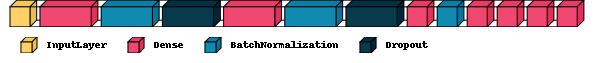

In [ ]:
import visualkeras
classical_nn, callbacks, Y_train= classical_model()
classical_nn.summary()
visualkeras.layered_view(classical_nn, legend = True)

In [ ]:
# Training the model
classical_history = classical_nn.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = 0.2, verbose = 1, callbacks = callbacks)

Epoch 1/20
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - fat_mae: 0.6625 - inj_mae: 1.9096 - loss: 48.6968 - loss_accuracy: 0.3882 - ns_mae: 0.8855 - val_fat_mae: 0.2805 - val_inj_mae: 1.6815 - val_loss: 38.1904 - val_loss_accuracy: 0.5932 - val_ns_mae: 0.2142 - learning_rate: 1.0000e-04
Epoch 2/20
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - fat_mae: 0.3855 - inj_mae: 1.6726 - loss: 33.7157 - loss_accuracy: 0.5654 - ns_mae: 0.2847 - val_fat_mae: 0.2167 - val_inj_mae: 1.6508 - val_loss: 27.0574 - val_loss_accuracy: 0.6096 - val_ns_mae: 0.0891 - learning_rate: 1.0000e-04
Epoch 3/20
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - fat_mae: 0.3185 - inj_mae: 1.4496 - loss: 22.6241 - loss_accuracy: 0.5880 - ns_mae: 0.1843 - val_fat_mae: 0.2202 - val_inj_mae: 1.6321 - val_loss: 19.7115 - val_loss_accuracy: 0.6179 - val_ns_mae: 0.0729 - learning_rate: 1.0000e-04
Epoch 4/20
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - fat_mae: 0.2952 - inj_mae: 1.4932 - loss: 16.4175 - loss_accuracy: 0.589

In [ ]:
!pip install --q gtts

from gtts import gTTS
from IPython.display import Audio

tts = gTTS('The Classical Neural Network has finished training') #Provide the string to convert to speech
tts.save('NN.wav')
sound_file = 'NN.wav'
Audio(sound_file, autoplay=True)

In [ ]:
# One-hot encode the 'loss' column
encoder = OneHotEncoder(sparse=False)
y_hat_loss_encoded = encoder.fit_transform(y_test['loss'].values.reshape(-1, 1))

# Prepare other target variables
y_hat_ns = y_test['ns'].values
y_hat_fat = y_test['fat'].values
y_hat_inj = y_test['inj'].values

In [ ]:
# Evaluating the model
loss, fat_mae, inj_mae, loss_acc, ns_mae = classical_nn.evaluate(X_test, [y_hat_ns, y_hat_fat, y_hat_inj, y_hat_loss_encoded])

432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - fat_mae: 0.1523 - inj_mae: 1.3048 - loss: 3.9199 - loss_accuracy: 0.6194 - ns_mae: 0.0295


In [ ]:
y_pred = classical_nn.predict(X_test)

432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [ ]:
y_pred

[array([[0.98826134],
        [0.9932795 ],
        [0.98704034],
        ...,
        [0.99273354],
        [1.0199943 ],
        [0.9950947 ]], dtype=float32),
 array([[-0.08925045],
        [ 0.04014085],
        [-0.05882202],
        ...,
        [-0.037073  ],
        [ 0.07202064],
        [ 0.01146512]], dtype=float32),
 array([[-0.01234338],
        [ 0.34822288],
        [ 0.03732694],
        ...,
        [-0.00398349],
        [ 0.11467986],
        [ 0.08267945]], dtype=float32),
 array([[8.79229069e-01, 8.70763734e-02, 2.94825975e-02, ...,
         7.74261862e-05, 2.23289899e-04, 1.19670329e-03],
        [1.73475727e-01, 6.06824756e-01, 1.97912753e-01, ...,
         9.96129165e-05, 1.08124157e-04, 1.45877086e-04],
        [6.47521317e-01, 2.24425614e-01, 1.12046756e-01, ...,
         2.51091842e-04, 5.61476103e-04, 3.65184969e-03],
        ...,
        [5.79445601e-01, 3.20110500e-01, 9.15901512e-02, ...,
         9.46451764e-05, 1.94818291e-04, 1.01821485e-03],
        [

In [ ]:
y_pred

[array([[0.99974114],
        [1.0013548 ],
        [1.0023603 ],
        ...,
        [1.0032227 ],
        [0.9940167 ],
        [1.0055404 ]], dtype=float32),
 array([[ 0.00600885],
        [ 0.13331471],
        [-0.01765884],
        ...,
        [ 0.02360757],
        [ 0.01145397],
        [ 0.00798832]], dtype=float32),
 array([[ 0.01612554],
        [ 0.45354968],
        [-0.02681206],
        ...,
        [ 0.03676353],
        [ 0.13128014],
        [ 0.00493871]], dtype=float32),
 array([[8.8908768e-01, 7.9316817e-02, 2.8109074e-02, ..., 3.8922419e-05,
         2.6273547e-04, 5.5850856e-04],
        [1.9482088e-01, 5.1904154e-01, 2.5339150e-01, ..., 9.9871504e-05,
         8.6895736e-05, 5.4574787e-04],
        [8.0566627e-01, 1.4405338e-01, 4.5070358e-02, ..., 5.2163770e-05,
         5.0777465e-04, 1.2556228e-03],
        ...,
        [7.0848894e-01, 2.1359932e-01, 7.0220634e-02, ..., 4.6546149e-05,
         2.9835736e-04, 8.4732572e-04],
        [7.9203814e-01, 1.6702569

In [ ]:
classification_predictions = np.argmax(y_pred[3], axis=1)
classification_test = y_test['loss']

In [ ]:
print(classification_predictions)
print(classification_test)

[0 1 0 ... 0 0 0]
39928    0.0
10527    0.0
48742    0.0
18386    1.0
13876    0.0
        ... 
60059    0.0
20174    2.0
34237    0.0
2233     0.0
61169    7.0
Name: loss, Length: 13800, dtype: float64


Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.80      0.77      7281
         1.0       0.45      0.34      0.39      2613
         2.0       0.43      0.44      0.44      2102
         3.0       0.40      0.17      0.24       684
         4.0       0.38      0.26      0.31       148
         5.0       0.00      0.00      0.00        22
         6.0       0.00      0.00      0.00        57
         7.0       0.58      0.86      0.69       893

    accuracy                           0.62     13800
   macro avg       0.37      0.36      0.35     13800
weighted avg       0.60      0.62      0.60     13800



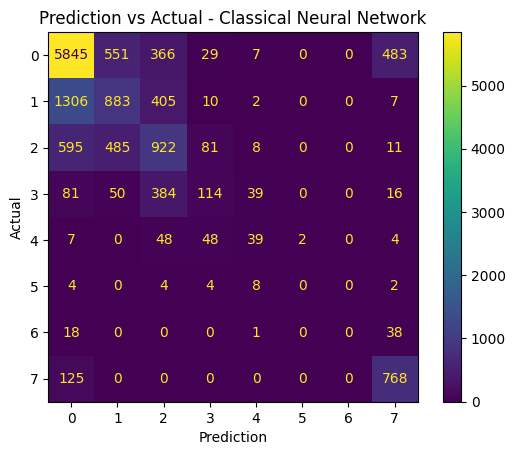

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating and printing the classification report

print(f"Classification report:\n{classification_report(classification_test, classification_predictions)}")

# Creating the confusion matrix

cm = confusion_matrix(classification_test, classification_predictions)

cmd = ConfusionMatrixDisplay(cm)

# Plotting the heatmap of the cm

cmd.display_labels = [i for i in range(8)]

cmd.plot()

plt.xlabel('Prediction')

plt.ylabel('Actual')

plt.title("Prediction vs Actual - Classical Neural Network")

plt.show()

Classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79      7281
         1.0       0.47      0.30      0.37      2613
         2.0       0.43      0.49      0.46      2102
         3.0       0.43      0.19      0.26       684
         4.0       0.34      0.09      0.15       148
         5.0       0.19      0.45      0.27        22
         6.0       0.00      0.00      0.00        57
         7.0       0.69      0.79      0.73       893

    accuracy                           0.64     13800
   macro avg       0.41      0.39      0.38     13800
weighted avg       0.61      0.64      0.62     13800



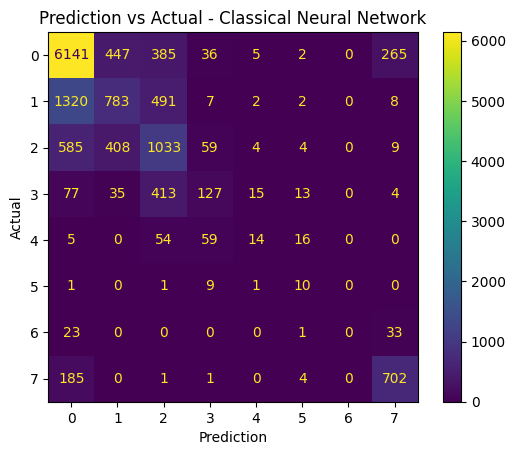

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating and printing the classification report

print(f"Classification report:\n{classification_report(classification_test, classification_predictions)}")

# Creating the confusion matrix

cm = confusion_matrix(classification_test, classification_predictions)

cmd = ConfusionMatrixDisplay(cm)

# Plotting the heatmap of the cm

cmd.display_labels = [i for i in range(8)]

cmd.plot()

plt.xlabel('Prediction')

plt.ylabel('Actual')

plt.title("Prediction vs Actual - Classical Neural Network")

plt.show()

#Quantum Neural Network

In [ ]:
#https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

In [ ]:
# Defining a function to "reset"
from tensorflow.keras import backend
import random

def reset():
  backend.clear_session()

  random.seed(42)
  np.random.seed(42)
  tf.random.set_seed(42)

In [ ]:
def create_quantum_layer():
  """Defines a quantum layer with trainable parameters."""
  qubit = cirq.GridQubit(0, 0)
  theta_x = sympy.Symbol('theta_x')
  theta_z = sympy.Symbol('theta_z')
  circuit = cirq.Circuit(
      cirq.X(qubit)**theta_x,
      cirq.Z(qubit)**theta_z
  )
  return tfq.layers.PQC(circuit, cirq.Z(qubit))

def quantum_classical_model(X, y_train):
  """Defines a hybrid quantum-classical model."""
  y_ns = y_train['ns'].values
  y_fat = y_train['fat'].values
  y_inj = y_train['inj'].values

  # One-hot encode the loss category
  y_loss_encoded = tf.keras.utils.to_categorical(y_train['loss'])

  input_layer = layers.Input(shape=(X.shape[1],))

  # Hidden layers
  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(input_layer)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  # Add quantum layer
  quantum_input = layers.Dense(1, activation='relu')(x)

  # Calculate the number of qubits dynamically
  quantum_input_num = 2 ** tf.math.ceil(tf.math.log(tf.cast(tf.shape(quantum_input)[0], dtype=tf.float32)) / tf.math.log(2.0))

  # Convert quantum_input_num to a string before formatting
  quantum_input_num_str = tf.strings.as_string(quantum_input_num)

  theta_x_tensor = tf.constant('theta_x')
  theta_z_tensor = tf.constant('theta_z')

  # Use the string version of quantum_input_num
  quantum_circuits_str = tf.strings.format("{} X(q[0])^{}, Z(q[0])^{}",
                                              quantum_input_num_str, theta_x_tensor, theta_z_tensor)
  quantum_input_circuits = tfq.layers.Circuit.from_sympy(quantum_circuits_str)

  # Continue with classical layers
  x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(quantum_output)
  x = layers.BatchNormalization()(x)

  # Branched output layers
  output1 = layers.Dense(1, activation='linear', name='ns')(x)
  output2 = layers.Dense(1, activation='linear', name='fat')(x)
  output3 = layers.Dense(1, activation='linear', name='inj')(x)
  output4 = layers.Dense(8, activation='softmax', name='loss')(x)

  model = Model(inputs=input_layer, outputs=[output1, output2, output3, output4])

  # Custom loss function for inj (optional)
  def custom_loss_inj(y_true, y_pred):
    return tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

  # Calculate class weights
  class_weights = np.bincount(y_train['loss'])
  class_weight_dict = dict(enumerate(class_weights))
  max_weight = max(class_weight_dict.values())
  class_weight_dict = {k: v/max_weight for k, v in class_weight_dict.items()}

  loss = {'ns': 'mean_squared_error', 'fat': 'mean_squared_error', 'inj': custom_loss_inj, 'loss': 'categorical_crossentropy'}
  loss_weights = {'ns': 1.0, 'fat': 1.0, 'inj': 1.0, 'loss': 1.5}

  metrics = {'ns': ['mae'], 'fat': ['mae'], 'inj': ['mae'], 'loss': ['accuracy']}

  # Defining callbacks
  model_checkpoint = ModelCheckpoint('Improved_Model.keras', save_best_only=True, monitor='val_loss')
  early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
  reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
  tensorboard_callback = TensorBoard(log_dir='./logs')

  callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau, tensorboard_callback]

  model.compile(loss=loss, loss_weights=loss_weights, optimizer=Adam(learning_rate=0.0001), metrics=metrics)

  return model, callbacks, [y_ns, y_fat, y_inj, y_loss_encoded]

In [ ]:
quantum_classical_model(X_train, y_train)

TypeError: Exception encountered when calling layer "tf.strings.format_4" (type TFOpLambda).

must be str, not tensorflow.python.framework.ops.EagerTensor

Call arguments received by layer "tf.strings.format_4" (type TFOpLambda):
  • template='{} X(q[0])^{}, Z(q[0])^{}'
  • inputs=tf.Tensor(shape=(), dtype=string)
  • placeholder=tf.Tensor(shape=(), dtype=string)
  • summarize=tf.Tensor(shape=(), dtype=string)
  • name=None

In [ ]:
import visualkeras
hybrid_nn, callbacks, Y_train = quantum_classical_model(X_train,)
hybrid_nn.summary()
visualkeras.layered_view(hybrid_nn, legend = True)

KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.int32, name=None), inferred_value=[None], name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
# Training the model
quantum_history = hybrid_nn.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = 0.2, verbose = 1, callbacks = callbacks)

#Sirikarn Messing Around Here, Be Warned!

In [ ]:
# Defining a function to "reset"
from tensorflow.keras import backend
import random

def reset():
  backend.clear_session()

  random.seed(42)
  np.random.seed(42)
  tf.random.set_seed(42)

In [ ]:
def classical_model():

  y_ns = y_train['ns'].values
  y_fat = y_train['fat'].values
  y_inj = y_train['inj'].values

  # One-hot encode the 'loss' column
  encoder = OneHotEncoder(sparse=False)
  y_loss_encoded = encoder.fit_transform(y_train['loss'].values.reshape(-1, 1))

  input_layer = layers.Input(shape=(X.shape[1],))  # Input layer

  # Hidden layers
  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(input_layer)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(64, activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)

  # Branched output layers
  output1 = layers.Dense(1, activation='linear', name='ns')(x)  # fatalities - Regression
  output2 = layers.Dense(1, activation='linear', name='fat')(x)  # injuries - Regression
  output3 = layers.Dense(1, activation='linear', name='inj')(x)  # number of states - Regression
  output4 = layers.Dense(8, activation='softmax', name='loss')(x)  # loss - Classification

  model = Model(inputs=input_layer, outputs=[output1, output2, output3, output4])

  # Custom loss function for inj (optional)
  def custom_loss_inj(y_true, y_pred):
      return tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

  # Calculate class weights
  class_weights = np.bincount(y_train['loss'])
  class_weight_dict = dict(enumerate(class_weights))
  max_weight = max(class_weight_dict.values())
  class_weight_dict = {k: v/max_weight for k, v in class_weight_dict.items()}

  loss = {'ns': 'mean_squared_error', 'fat': 'mean_squared_error', 'inj': custom_loss_inj, 'loss': 'categorical_crossentropy'}
  loss_weights = {'ns': 1.0, 'fat': 1.0, 'inj': 1.0, 'loss': 1.5}  # Adjust weights as needed
  metrics = {'ns': ['mae'], 'fat': ['mae'], 'inj': ['mae'], 'loss': ['accuracy']}

  # Defining callbacks
  model_checkpoint = ModelCheckpoint('Improved_Model.keras', save_best_only=True, monitor='val_loss')
  early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1)
  reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
  tensorboard_callback = TensorBoard(log_dir='./logs')

  callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau, tensorboard_callback]

  # Compiling the model
  model.compile(loss=loss, loss_weights=loss_weights, optimizer=Adam(learning_rate=0.0001), metrics=metrics)

  return model, callbacks, [y_ns, y_fat, y_inj, y_loss_encoded]

In [ ]:
import visualkeras
classical_nn, callbacks, Y_train= classical_model()
classical_nn.summary()
visualkeras.layered_view(classical_nn, legend = True)

NameError: name 'y_train' is not defined

In [ ]:
# Training the model
classical_history = classical_nn.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split = 0.2, verbose = 1, callbacks = callbacks)

In [ ]:
!pip install --q gtts

from gtts import gTTS
from IPython.display import Audio

tts = gTTS('The Classical Neural Network has finished training')
tts.save('NN.wav')
sound_file = 'NN.wav'
Audio(sound_file, autoplay=True)

In [ ]:
# One-hot encode the 'loss' column
encoder = OneHotEncoder(sparse=False)
y_hat_loss_encoded = encoder.fit_transform(y_test['loss'].values.reshape(-1, 1))

# Prepare other target variables
y_hat_ns = y_test['ns'].values
y_hat_fat = y_test['fat'].values
y_hat_inj = y_test['inj'].values

In [ ]:
# Evaluating the model
loss, fat_mae, inj_mae, loss_acc, ns_mae = classical_nn.evaluate(X_test, [y_hat_ns, y_hat_fat, y_hat_inj, y_hat_loss_encoded])

In [ ]:
y_pred = classical_nn.predict(X_test)

In [ ]:
y_pred

In [ ]:
classification_predictions = np.argmax(y_pred[3], axis=1)
classification_test = y_test['loss']

In [ ]:
print(classification_predictions)
print(classification_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating and printing the classification report

print(f"Classification report:\n{classification_report(classification_test, classification_predictions)}")

# Creating the confusion matrix

cm = confusion_matrix(classification_test, classification_predictions)

cmd = ConfusionMatrixDisplay(cm)

# Plotting the heatmap of the cm

cmd.display_labels = [i for i in range(8)]

cmd.plot()

plt.xlabel('Prediction')

plt.ylabel('Actual')

plt.title("Prediction vs Actual - Classical Neural Network")

plt.show()

#TEST

In [5]:
!pip install pennylane

In [6]:
import pennylane as qml

In [7]:
# Defining a function to "reset"
from tensorflow.keras import backend
import random

def reset():
  backend.clear_session()

  random.seed(42)
  np.random.seed(42)
  tf.random.set_seed(42)

In [ ]:
!pip install --upgrade tensorflow==2.10.0 # Choose a 2.x version

In [36]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 2
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

reset()

def quantum_model():

  y_ns = y_train['ns'].values
  y_fat = y_train['fat'].values
  y_inj = y_train['inj'].values

  # One-hot encode the 'loss' column
  encoder = OneHotEncoder(sparse=False)
  y_loss_encoded = encoder.fit_transform(y_train['loss'].values.reshape(-1, 1))

  input_layer = layers.Input(shape=(X.shape[1],))  # Input layer

  # Hidden layers
  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(input_layer)
  x = layers.Dense(n_qubits, activation='relu')(x)
  x = qlayer(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.4)(x)

  x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
  x = layers.BatchNormalization()(x)

  # Branched output layers
  output1 = layers.Dense(1, activation='linear', name='ns')(x)  # fatalities - Regression
  output2 = layers.Dense(1, activation='linear', name='fat')(x)  # injuries - Regression
  output3 = layers.Dense(1, activation='linear', name='inj')(x)  # number of states - Regression
  output4 = layers.Dense(4, activation='softmax', name='loss')(x)  # loss - Classification

  model = Model(inputs=input_layer, outputs=[output1, output2, output3, output4])

  # Custom loss function for inj (optional)
  def custom_loss_inj(y_true, y_pred):
      return tf.keras.losses.Huber(delta=1.0)(y_true, y_pred)

  # Calculate class weights
  class_weights = np.bincount(y_train['loss'])
  class_weight_dict = dict(enumerate(class_weights))
  max_weight = max(class_weight_dict.values())
  class_weight_dict = {k: v/max_weight for k, v in class_weight_dict.items()}

  loss = {'ns': 'mean_squared_error', 'fat': 'mean_squared_error', 'inj': custom_loss_inj, 'loss': 'categorical_crossentropy'}
  loss_weights = {'ns': 1.0, 'fat': 1.0, 'inj': 1.0, 'loss': 1.5}  # Adjust weights as needed
  metrics = {'ns': ['mae'], 'fat': ['mae'], 'inj': ['mae'], 'loss': ['accuracy']}

  # Defining callbacks
  model_checkpoint = ModelCheckpoint('Improved_Model.keras', save_best_only=True, monitor='val_loss')
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
  reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
  tensorboard_callback = TensorBoard(log_dir='./logs')

  callbacks = [model_checkpoint, early_stopping, reduce_lr_on_plateau, tensorboard_callback]

  # Compiling the model
  model.compile(loss=loss, loss_weights=loss_weights, optimizer=Adam(learning_rate=0.0001), metrics=metrics)

  return model, callbacks, [y_ns, y_fat, y_inj, y_loss_encoded]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 59)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 512)          30720       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            1026        ['dense[0][0]']                  
                                                                                                  
 keras_layer (KerasLayer)       (None, 2)            4           ['dense_1[0][0]']                
                                                                                              

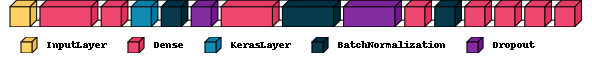

In [37]:
import visualkeras
quantum_model, callbacks, Y_train = quantum_model()
quantum_model.summary()
visualkeras.layered_view(quantum_model, legend = True)

In [ ]:
fitting = quantum_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

1258/1380 [==========================>...] - ETA: 24s - loss: 206.2292 - ns_loss: 79.8183 - fat_loss: 79.8737 - inj_loss: 0.7100 - loss_loss: 6.4896 - ns_mae: 1.2118 - fat_mae: 1.2248 - inj_mae: 1.0376 - loss_accuracy: 0.3302

1259/1380 [==========================>...] - ETA: 23s - loss: 206.1060 - ns_loss: 79.7586 - fat_loss: 79.8146 - inj_loss: 0.7098 - loss_loss: 6.4874 - ns_mae: 1.2116 - fat_mae: 1.2246 - inj_mae: 1.0373 - loss_accuracy: 0.3302

1260/1380 [==========================>...] - ETA: 23s - loss: 206.0089 - ns_loss: 79.7100 - fat_loss: 79.7657 - inj_loss: 0.7098 - loss_loss: 6.4882 - ns_mae: 1.2116 - fat_mae: 1.2246 - inj_mae: 1.0374 - loss_accuracy: 0.3303

1261/1380 [==========================>...] - ETA: 23s - loss: 206.0467 - ns_loss: 79.7281 - fat_loss: 79.7835 - inj_loss: 0.7104 - loss_loss: 6.4897 - ns_mae: 1.2122 - fat_mae: 1.2251 - inj_mae: 1.0380 - loss_accuracy: 0.3304

1262/1380 [==========================>...] - ETA: 23s - loss: 205.9218 - ns_loss: 79.6678 - fat_loss: 79.7229 - inj_loss: 0.7103 - loss_loss: 6.4877 - ns_mae: 1.2122 - fat_mae: 1.2250 - inj_mae: 1.0378 - loss_accuracy: 0.3305

1263/1380 [==========================>...] - ETA: 23s - loss: 205.7931 - ns_loss: 79.6062 - fat_loss: 79.6614 - inj_loss: 0.7099 - loss_loss: 6.4848 - ns_mae: 1.2119 - fat_mae: 1.2247 - inj_mae: 1.0375 - loss_accuracy: 0.3306

1264/1380 [==========================>...] - ETA: 22s - loss: 205.6650 - ns_loss: 79.5452 - fat_loss: 79.6001 - inj_loss: 0.7096 - loss_loss: 6.4817 - ns_mae: 1.2116 - fat_mae: 1.2244 - inj_mae: 1.0371 - loss_accuracy: 0.3306

1265/1380 [==========================>...] - ETA: 22s - loss: 205.5390 - ns_loss: 79.4847 - fat_loss: 79.5393 - inj_loss: 0.7093 - loss_loss: 6.4793 - ns_mae: 1.2115 - fat_mae: 1.2241 - inj_mae: 1.0369 - loss_accuracy: 0.3307

1266/1380 [==========================>...] - ETA: 22s - loss: 205.4158 - ns_loss: 79.4247 - fat_loss: 79.4790 - inj_loss: 0.7091 - loss_loss: 6.4781 - ns_mae: 1.2113 - fat_mae: 1.2239 - inj_mae: 1.0366 - loss_accuracy: 0.3308

1267/1380 [==========================>...] - ETA: 22s - loss: 205.2896 - ns_loss: 79.3645 - fat_loss: 79.4183 - inj_loss: 0.7088 - loss_loss: 6.4754 - ns_mae: 1.2112 - fat_mae: 1.2237 - inj_mae: 1.0363 - loss_accuracy: 0.3308

1268/1380 [==========================>...] - ETA: 22s - loss: 205.1633 - ns_loss: 79.3036 - fat_loss: 79.3574 - inj_loss: 0.7085 - loss_loss: 6.4731 - ns_mae: 1.2109 - fat_mae: 1.2234 - inj_mae: 1.0360 - loss_accuracy: 0.3309

1269/1380 [==========================>...] - ETA: 21s - loss: 205.0687 - ns_loss: 79.2511 - fat_loss: 79.3052 - inj_loss: 0.7085 - loss_loss: 6.4803 - ns_mae: 1.2108 - fat_mae: 1.2233 - inj_mae: 1.0360 - loss_accuracy: 0.3309

1270/1380 [==========================>...] - ETA: 21s - loss: 205.0600 - ns_loss: 79.2416 - fat_loss: 79.2956 - inj_loss: 0.7091 - loss_loss: 6.4874 - ns_mae: 1.2114 - fat_mae: 1.2239 - inj_mae: 1.0367 - loss_accuracy: 0.3309

1271/1380 [==========================>...] - ETA: 21s - loss: 204.9439 - ns_loss: 79.1838 - fat_loss: 79.2380 - inj_loss: 0.7091 - loss_loss: 6.4876 - ns_mae: 1.2114 - fat_mae: 1.2238 - inj_mae: 1.0367 - loss_accuracy: 0.3309

1272/1380 [==========================>...] - ETA: 21s - loss: 204.8197 - ns_loss: 79.1243 - fat_loss: 79.1784 - inj_loss: 0.7089 - loss_loss: 6.4849 - ns_mae: 1.2112 - fat_mae: 1.2237 - inj_mae: 1.0365 - loss_accuracy: 0.3309

1273/1380 [==========================>...] - ETA: 21s - loss: 204.7110 - ns_loss: 79.0708 - fat_loss: 79.1245 - inj_loss: 0.7089 - loss_loss: 6.4846 - ns_mae: 1.2113 - fat_mae: 1.2237 - inj_mae: 1.0365 - loss_accuracy: 0.3309

1274/1380 [==========================>...] - ETA: 21s - loss: 204.5853 - ns_loss: 79.0109 - fat_loss: 79.0643 - inj_loss: 0.7086 - loss_loss: 6.4816 - ns_mae: 1.2111 - fat_mae: 1.2235 - inj_mae: 1.0362 - loss_accuracy: 0.3310

1275/1380 [==========================>...] - ETA: 20s - loss: 204.4630 - ns_loss: 78.9517 - fat_loss: 79.0052 - inj_loss: 0.7085 - loss_loss: 6.4796 - ns_mae: 1.2111 - fat_mae: 1.2234 - inj_mae: 1.0361 - loss_accuracy: 0.3311

1276/1380 [==========================>...] - ETA: 20s - loss: 204.3429 - ns_loss: 78.8934 - fat_loss: 78.9470 - inj_loss: 0.7083 - loss_loss: 6.4779 - ns_mae: 1.2110 - fat_mae: 1.2232 - inj_mae: 1.0359 - loss_accuracy: 0.3312

1277/1380 [==========================>...] - ETA: 20s - loss: 204.2194 - ns_loss: 78.8338 - fat_loss: 78.8873 - inj_loss: 0.7080 - loss_loss: 6.4758 - ns_mae: 1.2108 - fat_mae: 1.2230 - inj_mae: 1.0357 - loss_accuracy: 0.3313

1278/1380 [==========================>...] - ETA: 20s - loss: 204.1325 - ns_loss: 78.7765 - fat_loss: 78.8298 - inj_loss: 0.7080 - loss_loss: 6.4950 - ns_mae: 1.2107 - fat_mae: 1.2229 - inj_mae: 1.0357 - loss_accuracy: 0.3315

1279/1380 [==========================>...] - ETA: 20s - loss: 204.0101 - ns_loss: 78.7176 - fat_loss: 78.7707 - inj_loss: 0.7078 - loss_loss: 6.4928 - ns_mae: 1.2106 - fat_mae: 1.2227 - inj_mae: 1.0354 - loss_accuracy: 0.3315

1280/1380 [==========================>...] - ETA: 19s - loss: 203.8852 - ns_loss: 78.6580 - fat_loss: 78.7109 - inj_loss: 0.7075 - loss_loss: 6.4899 - ns_mae: 1.2103 - fat_mae: 1.2224 - inj_mae: 1.0351 - loss_accuracy: 0.3315

1281/1380 [==========================>...] - ETA: 19s - loss: 203.8769 - ns_loss: 78.6433 - fat_loss: 78.6938 - inj_loss: 0.7079 - loss_loss: 6.5059 - ns_mae: 1.2107 - fat_mae: 1.2227 - inj_mae: 1.0355 - loss_accuracy: 0.3316

1282/1380 [==========================>...] - ETA: 19s - loss: 203.7579 - ns_loss: 78.5852 - fat_loss: 78.6362 - inj_loss: 0.7078 - loss_loss: 6.5043 - ns_mae: 1.2107 - fat_mae: 1.2226 - inj_mae: 1.0354 - loss_accuracy: 0.3318

1283/1380 [==========================>...] - ETA: 19s - loss: 203.6438 - ns_loss: 78.5295 - fat_loss: 78.5802 - inj_loss: 0.7077 - loss_loss: 6.5033 - ns_mae: 1.2106 - fat_mae: 1.2225 - inj_mae: 1.0353 - loss_accuracy: 0.3319

1284/1380 [==========================>...] - ETA: 19s - loss: 203.5245 - ns_loss: 78.4714 - fat_loss: 78.5220 - inj_loss: 0.7074 - loss_loss: 6.5021 - ns_mae: 1.2105 - fat_mae: 1.2223 - inj_mae: 1.0351 - loss_accuracy: 0.3320

1285/1380 [==========================>...] - ETA: 18s - loss: 203.4042 - ns_loss: 78.4130 - fat_loss: 78.4633 - inj_loss: 0.7072 - loss_loss: 6.5006 - ns_mae: 1.2103 - fat_mae: 1.2221 - inj_mae: 1.0349 - loss_accuracy: 0.3320

1286/1380 [==========================>...] - ETA: 18s - loss: 203.2800 - ns_loss: 78.3536 - fat_loss: 78.4039 - inj_loss: 0.7069 - loss_loss: 6.4978 - ns_mae: 1.2100 - fat_mae: 1.2218 - inj_mae: 1.0346 - loss_accuracy: 0.3321

1287/1380 [==========================>...] - ETA: 18s - loss: 203.1578 - ns_loss: 78.2948 - fat_loss: 78.3450 - inj_loss: 0.7066 - loss_loss: 6.4956 - ns_mae: 1.2098 - fat_mae: 1.2216 - inj_mae: 1.0343 - loss_accuracy: 0.3321

1288/1380 [===========================>..] - ETA: 18s - loss: 203.0720 - ns_loss: 78.2514 - fat_loss: 78.3002 - inj_loss: 0.7068 - loss_loss: 6.4977 - ns_mae: 1.2100 - fat_mae: 1.2217 - inj_mae: 1.0345 - loss_accuracy: 0.3322

1289/1380 [===========================>..] - ETA: 18s - loss: 202.9525 - ns_loss: 78.1925 - fat_loss: 78.2420 - inj_loss: 0.7066 - loss_loss: 6.4967 - ns_mae: 1.2098 - fat_mae: 1.2215 - inj_mae: 1.0343 - loss_accuracy: 0.3323

1290/1380 [===========================>..] - ETA: 17s - loss: 202.8300 - ns_loss: 78.1339 - fat_loss: 78.1829 - inj_loss: 0.7063 - loss_loss: 6.4943 - ns_mae: 1.2096 - fat_mae: 1.2213 - inj_mae: 1.0340 - loss_accuracy: 0.3324

1291/1380 [===========================>..] - ETA: 17s - loss: 202.7083 - ns_loss: 78.0752 - fat_loss: 78.1240 - inj_loss: 0.7061 - loss_loss: 6.4923 - ns_mae: 1.2094 - fat_mae: 1.2210 - inj_mae: 1.0337 - loss_accuracy: 0.3325

1292/1380 [===========================>..] - ETA: 17s - loss: 202.6025 - ns_loss: 78.0227 - fat_loss: 78.0711 - inj_loss: 0.7060 - loss_loss: 6.4926 - ns_mae: 1.2095 - fat_mae: 1.2210 - inj_mae: 1.0337 - loss_accuracy: 0.3326

1293/1380 [===========================>..] - ETA: 17s - loss: 202.4921 - ns_loss: 77.9669 - fat_loss: 78.0152 - inj_loss: 0.7059 - loss_loss: 6.4941 - ns_mae: 1.2093 - fat_mae: 1.2208 - inj_mae: 1.0336 - loss_accuracy: 0.3327

1294/1380 [===========================>..] - ETA: 17s - loss: 202.3694 - ns_loss: 77.9083 - fat_loss: 77.9568 - inj_loss: 0.7055 - loss_loss: 6.4911 - ns_mae: 1.2090 - fat_mae: 1.2206 - inj_mae: 1.0332 - loss_accuracy: 0.3329

1295/1380 [===========================>..] - ETA: 16s - loss: 202.6101 - ns_loss: 78.0273 - fat_loss: 78.0749 - inj_loss: 0.7065 - loss_loss: 6.4935 - ns_mae: 1.2098 - fat_mae: 1.2213 - inj_mae: 1.0341 - loss_accuracy: 0.3328

1296/1380 [===========================>..] - ETA: 16s - loss: 202.9743 - ns_loss: 78.1947 - fat_loss: 78.2404 - inj_loss: 0.7076 - loss_loss: 6.5142 - ns_mae: 1.2107 - fat_mae: 1.2223 - inj_mae: 1.0352 - loss_accuracy: 0.3329

1297/1380 [===========================>..] - ETA: 16s - loss: 202.8533 - ns_loss: 78.1365 - fat_loss: 78.1819 - inj_loss: 0.7073 - loss_loss: 6.5120 - ns_mae: 1.2105 - fat_mae: 1.2220 - inj_mae: 1.0350 - loss_accuracy: 0.3330

1298/1380 [===========================>..] - ETA: 16s - loss: 202.7338 - ns_loss: 78.0791 - fat_loss: 78.1238 - inj_loss: 0.7071 - loss_loss: 6.5101 - ns_mae: 1.2104 - fat_mae: 1.2218 - inj_mae: 1.0347 - loss_accuracy: 0.3331

1299/1380 [===========================>..] - ETA: 16s - loss: 202.6604 - ns_loss: 78.0419 - fat_loss: 78.0862 - inj_loss: 0.7072 - loss_loss: 6.5115 - ns_mae: 1.2105 - fat_mae: 1.2219 - inj_mae: 1.0349 - loss_accuracy: 0.3333

1300/1380 [===========================>..] - ETA: 15s - loss: 202.5422 - ns_loss: 77.9844 - fat_loss: 78.0287 - inj_loss: 0.7071 - loss_loss: 6.5100 - ns_mae: 1.2104 - fat_mae: 1.2218 - inj_mae: 1.0348 - loss_accuracy: 0.3333

1301/1380 [===========================>..] - ETA: 15s - loss: 202.4208 - ns_loss: 77.9261 - fat_loss: 77.9707 - inj_loss: 0.7068 - loss_loss: 6.5074 - ns_mae: 1.2101 - fat_mae: 1.2215 - inj_mae: 1.0345 - loss_accuracy: 0.3333

1302/1380 [===========================>..] - ETA: 15s - loss: 204.8447 - ns_loss: 79.1349 - fat_loss: 79.1704 - inj_loss: 0.7095 - loss_loss: 6.5164 - ns_mae: 1.2129 - fat_mae: 1.2242 - inj_mae: 1.0372 - loss_accuracy: 0.3334

1303/1380 [===========================>..] - ETA: 15s - loss: 204.7191 - ns_loss: 79.0750 - fat_loss: 79.1107 - inj_loss: 0.7093 - loss_loss: 6.5131 - ns_mae: 1.2126 - fat_mae: 1.2240 - inj_mae: 1.0370 - loss_accuracy: 0.3334

1304/1380 [===========================>..] - ETA: 15s - loss: 204.5968 - ns_loss: 79.0163 - fat_loss: 79.0512 - inj_loss: 0.7090 - loss_loss: 6.5111 - ns_mae: 1.2124 - fat_mae: 1.2237 - inj_mae: 1.0368 - loss_accuracy: 0.3333

1305/1380 [===========================>..] - ETA: 14s - loss: 204.4756 - ns_loss: 78.9579 - fat_loss: 78.9928 - inj_loss: 0.7088 - loss_loss: 6.5089 - ns_mae: 1.2122 - fat_mae: 1.2235 - inj_mae: 1.0365 - loss_accuracy: 0.3334

1306/1380 [===========================>..] - ETA: 14s - loss: 204.3555 - ns_loss: 78.9002 - fat_loss: 78.9351 - inj_loss: 0.7086 - loss_loss: 6.5064 - ns_mae: 1.2121 - fat_mae: 1.2234 - inj_mae: 1.0364 - loss_accuracy: 0.3336

1307/1380 [===========================>..] - ETA: 14s - loss: 204.2358 - ns_loss: 78.8430 - fat_loss: 78.8774 - inj_loss: 0.7084 - loss_loss: 6.5040 - ns_mae: 1.2120 - fat_mae: 1.2232 - inj_mae: 1.0362 - loss_accuracy: 0.3337

1308/1380 [===========================>..] - ETA: 14s - loss: 204.1149 - ns_loss: 78.7841 - fat_loss: 78.8189 - inj_loss: 0.7083 - loss_loss: 6.5022 - ns_mae: 1.2117 - fat_mae: 1.2232 - inj_mae: 1.0360 - loss_accuracy: 0.3337

1309/1380 [===========================>..] - ETA: 14s - loss: 203.9922 - ns_loss: 78.7255 - fat_loss: 78.7603 - inj_loss: 0.7080 - loss_loss: 6.4994 - ns_mae: 1.2115 - fat_mae: 1.2228 - inj_mae: 1.0357 - loss_accuracy: 0.3338

1310/1380 [===========================>..] - ETA: 13s - loss: 204.0411 - ns_loss: 78.7448 - fat_loss: 78.7812 - inj_loss: 0.7085 - loss_loss: 6.5054 - ns_mae: 1.2119 - fat_mae: 1.2233 - inj_mae: 1.0363 - loss_accuracy: 0.3339

1311/1380 [===========================>..] - ETA: 13s - loss: 203.9188 - ns_loss: 78.6864 - fat_loss: 78.7225 - inj_loss: 0.7082 - loss_loss: 6.5027 - ns_mae: 1.2117 - fat_mae: 1.2230 - inj_mae: 1.0360 - loss_accuracy: 0.3340

1312/1380 [===========================>..] - ETA: 13s - loss: 203.7969 - ns_loss: 78.6283 - fat_loss: 78.6640 - inj_loss: 0.7079 - loss_loss: 6.4999 - ns_mae: 1.2115 - fat_mae: 1.2227 - inj_mae: 1.0357 - loss_accuracy: 0.3340

1313/1380 [===========================>..] - ETA: 13s - loss: 203.6763 - ns_loss: 78.5702 - fat_loss: 78.6061 - inj_loss: 0.7076 - loss_loss: 6.4976 - ns_mae: 1.2113 - fat_mae: 1.2225 - inj_mae: 1.0354 - loss_accuracy: 0.3341

1314/1380 [===========================>..] - ETA: 13s - loss: 203.5568 - ns_loss: 78.5127 - fat_loss: 78.5488 - inj_loss: 0.7074 - loss_loss: 6.4952 - ns_mae: 1.2111 - fat_mae: 1.2223 - inj_mae: 1.0352 - loss_accuracy: 0.3341

1315/1380 [===========================>..] - ETA: 12s - loss: 203.4422 - ns_loss: 78.4572 - fat_loss: 78.4931 - inj_loss: 0.7072 - loss_loss: 6.4936 - ns_mae: 1.2110 - fat_mae: 1.2223 - inj_mae: 1.0350 - loss_accuracy: 0.3341

1316/1380 [===========================>..] - ETA: 12s - loss: 203.3310 - ns_loss: 78.4000 - fat_loss: 78.4361 - inj_loss: 0.7071 - loss_loss: 6.4963 - ns_mae: 1.2109 - fat_mae: 1.2221 - inj_mae: 1.0349 - loss_accuracy: 0.3342

1317/1380 [===========================>..] - ETA: 12s - loss: 203.2213 - ns_loss: 78.3460 - fat_loss: 78.3818 - inj_loss: 0.7071 - loss_loss: 6.4960 - ns_mae: 1.2109 - fat_mae: 1.2221 - inj_mae: 1.0349 - loss_accuracy: 0.3343

1318/1380 [===========================>..] - ETA: 12s - loss: 203.1037 - ns_loss: 78.2887 - fat_loss: 78.3244 - inj_loss: 0.7068 - loss_loss: 6.4947 - ns_mae: 1.2107 - fat_mae: 1.2219 - inj_mae: 1.0346 - loss_accuracy: 0.3344

1319/1380 [===========================>..] - ETA: 12s - loss: 202.9884 - ns_loss: 78.2329 - fat_loss: 78.2684 - inj_loss: 0.7067 - loss_loss: 6.4930 - ns_mae: 1.2106 - fat_mae: 1.2218 - inj_mae: 1.0345 - loss_accuracy: 0.3344

1320/1380 [===========================>..] - ETA: 11s - loss: 202.8686 - ns_loss: 78.1752 - fat_loss: 78.2112 - inj_loss: 0.7065 - loss_loss: 6.4905 - ns_mae: 1.2104 - fat_mae: 1.2216 - inj_mae: 1.0343 - loss_accuracy: 0.3345

1321/1380 [===========================>..] - ETA: 11s - loss: 202.7490 - ns_loss: 78.1179 - fat_loss: 78.1544 - inj_loss: 0.7061 - loss_loss: 6.4876 - ns_mae: 1.2102 - fat_mae: 1.2214 - inj_mae: 1.0340 - loss_accuracy: 0.3345

1322/1380 [===========================>..] - ETA: 11s - loss: 202.6476 - ns_loss: 78.0658 - fat_loss: 78.1028 - inj_loss: 0.7061 - loss_loss: 6.4897 - ns_mae: 1.2102 - fat_mae: 1.2214 - inj_mae: 1.0339 - loss_accuracy: 0.3346

1323/1380 [===========================>..] - ETA: 11s - loss: 203.4789 - ns_loss: 78.4719 - fat_loss: 78.5066 - inj_loss: 0.7078 - loss_loss: 6.5034 - ns_mae: 1.2118 - fat_mae: 1.2230 - inj_mae: 1.0356 - loss_accuracy: 0.3346

1324/1380 [===========================>..] - ETA: 11s - loss: 203.3596 - ns_loss: 78.4147 - fat_loss: 78.4492 - inj_loss: 0.7075 - loss_loss: 6.5010 - ns_mae: 1.2116 - fat_mae: 1.2228 - inj_mae: 1.0354 - loss_accuracy: 0.3346

1325/1380 [===========================>..] - ETA: 10s - loss: 203.2421 - ns_loss: 78.3586 - fat_loss: 78.3927 - inj_loss: 0.7073 - loss_loss: 6.4985 - ns_mae: 1.2115 - fat_mae: 1.2227 - inj_mae: 1.0351 - loss_accuracy: 0.3346

1326/1380 [===========================>..] - ETA: 10s - loss: 203.1425 - ns_loss: 78.3091 - fat_loss: 78.3427 - inj_loss: 0.7074 - loss_loss: 6.4989 - ns_mae: 1.2116 - fat_mae: 1.2228 - inj_mae: 1.0353 - loss_accuracy: 0.3347

1327/1380 [===========================>..] - ETA: 10s - loss: 203.0287 - ns_loss: 78.2528 - fat_loss: 78.2867 - inj_loss: 0.7073 - loss_loss: 6.4986 - ns_mae: 1.2115 - fat_mae: 1.2227 - inj_mae: 1.0351 - loss_accuracy: 0.3347

1328/1380 [===========================>..] - ETA: 10s - loss: 202.9189 - ns_loss: 78.1992 - fat_loss: 78.2328 - inj_loss: 0.7073 - loss_loss: 6.4976 - ns_mae: 1.2115 - fat_mae: 1.2226 - inj_mae: 1.0352 - loss_accuracy: 0.3348

1329/1380 [===========================>..] - ETA: 10s - loss: 202.8000 - ns_loss: 78.1423 - fat_loss: 78.1762 - inj_loss: 0.7070 - loss_loss: 6.4947 - ns_mae: 1.2113 - fat_mae: 1.2224 - inj_mae: 1.0349 - loss_accuracy: 0.3349

1330/1380 [===========================>..] - ETA: 9s - loss: 202.6902 - ns_loss: 78.0869 - fat_loss: 78.1206 - inj_loss: 0.7070 - loss_loss: 6.4962 - ns_mae: 1.2112 - fat_mae: 1.2223 - inj_mae: 1.0348 - loss_accuracy: 0.3350 

1331/1380 [===========================>..] - ETA: 9s - loss: 202.7431 - ns_loss: 78.1112 - fat_loss: 78.1441 - inj_loss: 0.7075 - loss_loss: 6.4997 - ns_mae: 1.2116 - fat_mae: 1.2227 - inj_mae: 1.0353 - loss_accuracy: 0.3351

1332/1380 [===========================>..] - ETA: 9s - loss: 202.6248 - ns_loss: 78.0544 - fat_loss: 78.0873 - inj_loss: 0.7073 - loss_loss: 6.4974 - ns_mae: 1.2114 - fat_mae: 1.2224 - inj_mae: 1.0351 - loss_accuracy: 0.3352

1333/1380 [===========================>..] - ETA: 9s - loss: 202.6272 - ns_loss: 78.0504 - fat_loss: 78.0847 - inj_loss: 0.7077 - loss_loss: 6.5035 - ns_mae: 1.2118 - fat_mae: 1.2228 - inj_mae: 1.0356 - loss_accuracy: 0.3354

1334/1380 [============================>.] - ETA: 9s - loss: 202.5133 - ns_loss: 77.9957 - fat_loss: 78.0297 - inj_loss: 0.7076 - loss_loss: 6.5014 - ns_mae: 1.2117 - fat_mae: 1.2226 - inj_mae: 1.0354 - loss_accuracy: 0.3355

1335/1380 [============================>.] - ETA: 8s - loss: 202.3940 - ns_loss: 77.9384 - fat_loss: 77.9732 - inj_loss: 0.7072 - loss_loss: 6.4986 - ns_mae: 1.2114 - fat_mae: 1.2224 - inj_mae: 1.0351 - loss_accuracy: 0.3356

1336/1380 [============================>.] - ETA: 8s - loss: 202.2779 - ns_loss: 77.8823 - fat_loss: 77.9170 - inj_loss: 0.7070 - loss_loss: 6.4967 - ns_mae: 1.2112 - fat_mae: 1.2221 - inj_mae: 1.0348 - loss_accuracy: 0.3358

1337/1380 [============================>.] - ETA: 8s - loss: 202.1731 - ns_loss: 77.8306 - fat_loss: 77.8652 - inj_loss: 0.7069 - loss_loss: 6.4965 - ns_mae: 1.2111 - fat_mae: 1.2221 - inj_mae: 1.0347 - loss_accuracy: 0.3358

1338/1380 [============================>.] - ETA: 8s - loss: 202.0583 - ns_loss: 77.7752 - fat_loss: 77.8093 - inj_loss: 0.7067 - loss_loss: 6.4949 - ns_mae: 1.2110 - fat_mae: 1.2219 - inj_mae: 1.0345 - loss_accuracy: 0.3358

1339/1380 [============================>.] - ETA: 8s - loss: 201.9413 - ns_loss: 77.7189 - fat_loss: 77.7530 - inj_loss: 0.7064 - loss_loss: 6.4928 - ns_mae: 1.2108 - fat_mae: 1.2217 - inj_mae: 1.0342 - loss_accuracy: 0.3358

1340/1380 [============================>.] - ETA: 7s - loss: 201.8234 - ns_loss: 77.6625 - fat_loss: 77.6968 - inj_loss: 0.7061 - loss_loss: 6.4900 - ns_mae: 1.2105 - fat_mae: 1.2214 - inj_mae: 1.0339 - loss_accuracy: 0.3360

1341/1380 [============================>.] - ETA: 7s - loss: 202.1694 - ns_loss: 77.8215 - fat_loss: 77.8619 - inj_loss: 0.7072 - loss_loss: 6.5044 - ns_mae: 1.2115 - fat_mae: 1.2224 - inj_mae: 1.0350 - loss_accuracy: 0.3361

1342/1380 [============================>.] - ETA: 7s - loss: 202.0934 - ns_loss: 77.7832 - fat_loss: 77.8230 - inj_loss: 0.7074 - loss_loss: 6.5055 - ns_mae: 1.2117 - fat_mae: 1.2227 - inj_mae: 1.0353 - loss_accuracy: 0.3362

1343/1380 [============================>.] - ETA: 7s - loss: 202.1468 - ns_loss: 77.8078 - fat_loss: 77.8470 - inj_loss: 0.7079 - loss_loss: 6.5090 - ns_mae: 1.2121 - fat_mae: 1.2230 - inj_mae: 1.0357 - loss_accuracy: 0.3361

1344/1380 [============================>.] - ETA: 7s - loss: 202.0597 - ns_loss: 77.7594 - fat_loss: 77.7994 - inj_loss: 0.7080 - loss_loss: 6.5155 - ns_mae: 1.2120 - fat_mae: 1.2230 - inj_mae: 1.0359 - loss_accuracy: 0.3363

1345/1380 [============================>.] - ETA: 6s - loss: 201.9422 - ns_loss: 77.7036 - fat_loss: 77.7436 - inj_loss: 0.7078 - loss_loss: 6.5123 - ns_mae: 1.2118 - fat_mae: 1.2228 - inj_mae: 1.0356 - loss_accuracy: 0.3363

1346/1380 [============================>.] - ETA: 6s - loss: 201.8279 - ns_loss: 77.6477 - fat_loss: 77.6885 - inj_loss: 0.7076 - loss_loss: 6.5107 - ns_mae: 1.2116 - fat_mae: 1.2226 - inj_mae: 1.0354 - loss_accuracy: 0.3364

1347/1380 [============================>.] - ETA: 6s - loss: 201.7198 - ns_loss: 77.5938 - fat_loss: 77.6344 - inj_loss: 0.7075 - loss_loss: 6.5113 - ns_mae: 1.2115 - fat_mae: 1.2225 - inj_mae: 1.0353 - loss_accuracy: 0.3365

1348/1380 [============================>.] - ETA: 6s - loss: 201.6400 - ns_loss: 77.5532 - fat_loss: 77.5951 - inj_loss: 0.7076 - loss_loss: 6.5118 - ns_mae: 1.2116 - fat_mae: 1.2226 - inj_mae: 1.0355 - loss_accuracy: 0.3365

1349/1380 [============================>.] - ETA: 6s - loss: 201.5278 - ns_loss: 77.4985 - fat_loss: 77.5405 - inj_loss: 0.7076 - loss_loss: 6.5106 - ns_mae: 1.2115 - fat_mae: 1.2226 - inj_mae: 1.0354 - loss_accuracy: 0.3366

1350/1380 [============================>.] - ETA: 5s - loss: 201.4202 - ns_loss: 77.4461 - fat_loss: 77.4881 - inj_loss: 0.7074 - loss_loss: 6.5094 - ns_mae: 1.2114 - fat_mae: 1.2224 - inj_mae: 1.0353 - loss_accuracy: 0.3366

1351/1380 [============================>.] - ETA: 5s - loss: 201.3089 - ns_loss: 77.3919 - fat_loss: 77.4337 - inj_loss: 0.7073 - loss_loss: 6.5081 - ns_mae: 1.2114 - fat_mae: 1.2224 - inj_mae: 1.0352 - loss_accuracy: 0.3366

1352/1380 [============================>.] - ETA: 5s - loss: 201.1936 - ns_loss: 77.3362 - fat_loss: 77.3780 - inj_loss: 0.7071 - loss_loss: 6.5063 - ns_mae: 1.2112 - fat_mae: 1.2221 - inj_mae: 1.0350 - loss_accuracy: 0.3366

1353/1380 [============================>.] - ETA: 5s - loss: 201.0811 - ns_loss: 77.2819 - fat_loss: 77.3237 - inj_loss: 0.7069 - loss_loss: 6.5043 - ns_mae: 1.2111 - fat_mae: 1.2219 - inj_mae: 1.0348 - loss_accuracy: 0.3367

1354/1380 [============================>.] - ETA: 5s - loss: 200.9681 - ns_loss: 77.2266 - fat_loss: 77.2686 - inj_loss: 0.7067 - loss_loss: 6.5033 - ns_mae: 1.2109 - fat_mae: 1.2217 - inj_mae: 1.0346 - loss_accuracy: 0.3367

1355/1380 [============================>.] - ETA: 4s - loss: 200.8678 - ns_loss: 77.1782 - fat_loss: 77.2209 - inj_loss: 0.7066 - loss_loss: 6.5012 - ns_mae: 1.2109 - fat_mae: 1.2217 - inj_mae: 1.0345 - loss_accuracy: 0.3368

1356/1380 [============================>.] - ETA: 4s - loss: 200.7547 - ns_loss: 77.1232 - fat_loss: 77.1660 - inj_loss: 0.7064 - loss_loss: 6.4997 - ns_mae: 1.2107 - fat_mae: 1.2215 - inj_mae: 1.0343 - loss_accuracy: 0.3368

1357/1380 [============================>.] - ETA: 4s - loss: 200.6406 - ns_loss: 77.0679 - fat_loss: 77.1108 - inj_loss: 0.7063 - loss_loss: 6.4979 - ns_mae: 1.2105 - fat_mae: 1.2214 - inj_mae: 1.0343 - loss_accuracy: 0.3368

1358/1380 [============================>.] - ETA: 4s - loss: 200.5255 - ns_loss: 77.0125 - fat_loss: 77.0557 - inj_loss: 0.7060 - loss_loss: 6.4956 - ns_mae: 1.2102 - fat_mae: 1.2211 - inj_mae: 1.0339 - loss_accuracy: 0.3369

1359/1380 [============================>.] - ETA: 4s - loss: 200.4115 - ns_loss: 76.9579 - fat_loss: 77.0015 - inj_loss: 0.7057 - loss_loss: 6.4929 - ns_mae: 1.2100 - fat_mae: 1.2210 - inj_mae: 1.0337 - loss_accuracy: 0.3370

1360/1380 [============================>.] - ETA: 3s - loss: 200.3017 - ns_loss: 76.9042 - fat_loss: 76.9480 - inj_loss: 0.7056 - loss_loss: 6.4919 - ns_mae: 1.2098 - fat_mae: 1.2208 - inj_mae: 1.0336 - loss_accuracy: 0.3372

1361/1380 [============================>.] - ETA: 3s - loss: 200.1879 - ns_loss: 76.8496 - fat_loss: 76.8937 - inj_loss: 0.7054 - loss_loss: 6.4893 - ns_mae: 1.2097 - fat_mae: 1.2206 - inj_mae: 1.0333 - loss_accuracy: 0.3373

1362/1380 [============================>.] - ETA: 3s - loss: 200.0747 - ns_loss: 76.7955 - fat_loss: 76.8398 - inj_loss: 0.7051 - loss_loss: 6.4866 - ns_mae: 1.2095 - fat_mae: 1.2205 - inj_mae: 1.0331 - loss_accuracy: 0.3374

1363/1380 [============================>.] - ETA: 3s - loss: 199.9605 - ns_loss: 76.7403 - fat_loss: 76.7847 - inj_loss: 0.7049 - loss_loss: 6.4846 - ns_mae: 1.2093 - fat_mae: 1.2203 - inj_mae: 1.0329 - loss_accuracy: 0.3374

1364/1380 [============================>.] - ETA: 3s - loss: 199.8562 - ns_loss: 76.6892 - fat_loss: 76.7343 - inj_loss: 0.7048 - loss_loss: 6.4834 - ns_mae: 1.2093 - fat_mae: 1.2203 - inj_mae: 1.0328 - loss_accuracy: 0.3376

1365/1380 [============================>.] - ETA: 2s - loss: 199.7465 - ns_loss: 76.6362 - fat_loss: 76.6812 - inj_loss: 0.7047 - loss_loss: 6.4816 - ns_mae: 1.2091 - fat_mae: 1.2202 - inj_mae: 1.0327 - loss_accuracy: 0.3377

1366/1380 [============================>.] - ETA: 2s - loss: 199.6368 - ns_loss: 76.5838 - fat_loss: 76.6288 - inj_loss: 0.7046 - loss_loss: 6.4790 - ns_mae: 1.2090 - fat_mae: 1.2201 - inj_mae: 1.0326 - loss_accuracy: 0.3379

1367/1380 [============================>.] - ETA: 2s - loss: 199.5227 - ns_loss: 76.5296 - fat_loss: 76.5747 - inj_loss: 0.7043 - loss_loss: 6.4759 - ns_mae: 1.2087 - fat_mae: 1.2199 - inj_mae: 1.0323 - loss_accuracy: 0.3381

1368/1380 [============================>.] - ETA: 2s - loss: 199.4108 - ns_loss: 76.4754 - fat_loss: 76.5207 - inj_loss: 0.7041 - loss_loss: 6.4741 - ns_mae: 1.2086 - fat_mae: 1.2197 - inj_mae: 1.0321 - loss_accuracy: 0.3382

1369/1380 [============================>.] - ETA: 2s - loss: 199.3039 - ns_loss: 76.4219 - fat_loss: 76.4672 - inj_loss: 0.7040 - loss_loss: 6.4748 - ns_mae: 1.2085 - fat_mae: 1.2196 - inj_mae: 1.0320 - loss_accuracy: 0.3383

1370/1380 [============================>.] - ETA: 1s - loss: 199.1918 - ns_loss: 76.3677 - fat_loss: 76.4124 - inj_loss: 0.7037 - loss_loss: 6.4735 - ns_mae: 1.2083 - fat_mae: 1.2192 - inj_mae: 1.0318 - loss_accuracy: 0.3382

1371/1380 [============================>.] - ETA: 1s - loss: 199.0822 - ns_loss: 76.3142 - fat_loss: 76.3585 - inj_loss: 0.7035 - loss_loss: 6.4727 - ns_mae: 1.2082 - fat_mae: 1.2190 - inj_mae: 1.0316 - loss_accuracy: 0.3382

1372/1380 [============================>.] - ETA: 1s - loss: 198.9690 - ns_loss: 76.2602 - fat_loss: 76.3043 - inj_loss: 0.7033 - loss_loss: 6.4701 - ns_mae: 1.2079 - fat_mae: 1.2187 - inj_mae: 1.0313 - loss_accuracy: 0.3382

1373/1380 [============================>.] - ETA: 1s - loss: 198.8614 - ns_loss: 76.2082 - fat_loss: 76.2521 - inj_loss: 0.7031 - loss_loss: 6.4685 - ns_mae: 1.2078 - fat_mae: 1.2186 - inj_mae: 1.0312 - loss_accuracy: 0.3383

1374/1380 [============================>.] - ETA: 1s - loss: 198.7665 - ns_loss: 76.1615 - fat_loss: 76.2053 - inj_loss: 0.7030 - loss_loss: 6.4682 - ns_mae: 1.2078 - fat_mae: 1.2186 - inj_mae: 1.0311 - loss_accuracy: 0.3384

1375/1380 [============================>.] - ETA: 0s - loss: 198.6535 - ns_loss: 76.1077 - fat_loss: 76.1514 - inj_loss: 0.7028 - loss_loss: 6.4654 - ns_mae: 1.2075 - fat_mae: 1.2183 - inj_mae: 1.0308 - loss_accuracy: 0.3385

1376/1380 [============================>.] - ETA: 0s - loss: 198.5407 - ns_loss: 76.0540 - fat_loss: 76.0974 - inj_loss: 0.7025 - loss_loss: 6.4627 - ns_mae: 1.2072 - fat_mae: 1.2180 - inj_mae: 1.0305 - loss_accuracy: 0.3386

1377/1380 [============================>.] - ETA: 0s - loss: 198.4309 - ns_loss: 76.0016 - fat_loss: 76.0446 - inj_loss: 0.7023 - loss_loss: 6.4604 - ns_mae: 1.2072 - fat_mae: 1.2179 - inj_mae: 1.0303 - loss_accuracy: 0.3386

1378/1380 [============================>.] - ETA: 0s - loss: 198.3220 - ns_loss: 75.9487 - fat_loss: 75.9919 - inj_loss: 0.7021 - loss_loss: 6.4589 - ns_mae: 1.2070 - fat_mae: 1.2177 - inj_mae: 1.0301 - loss_accuracy: 0.3385

1379/1380 [============================>.] - ETA: 0s - loss: 198.2146 - ns_loss: 75.8964 - fat_loss: 75.9393 - inj_loss: 0.7019 - loss_loss: 6.4579 - ns_mae: 1.2070 - fat_mae: 1.2176 - inj_mae: 1.0300 - loss_accuracy: 0.3385

1380/1380 [==============================] - 297s 215ms/step - loss: 199.0832 - ns_loss: 76.3121 - fat_loss: 76.3554 - inj_loss: 0.7035 - loss_loss: 6.4818 - ns_mae: 1.2084 - fat_mae: 1.2190 - inj_mae: 1.0316 - loss_accuracy: 0.3385 - val_loss: 304.7925 - val_ns_loss: 129.0198 - val_fat_loss: 128.8712 - val_inj_loss: 0.6803 - val_loss_loss: 7.5973 - val_ns_mae: 1.1778 - val_fat_mae: 1.0445 - val_inj_mae: 0.9900 - val_loss_accuracy: 0.2163
Epoch 3/10


   1/1380 [..............................] - ETA: 4:03 - loss: 43.8161 - ns_loss: 1.9978 - fat_loss: 2.3316 - inj_loss: 0.4577 - loss_loss: 2.8024 - ns_mae: 0.9987 - fat_mae: 1.0534 - inj_mae: 0.8283 - loss_accuracy: 0.2812

   2/1380 [..............................] - ETA: 5:16 - loss: 43.2433 - ns_loss: 2.3364 - fat_loss: 2.2260 - inj_loss: 0.3659 - loss_loss: 2.3270 - ns_mae: 0.9720 - fat_mae: 0.9556 - inj_mae: 0.7215 - loss_accuracy: 0.4062

   3/1380 [..............................] - ETA: 4:41 - loss: 43.9148 - ns_loss: 2.3902 - fat_loss: 2.6045 - inj_loss: 0.3564 - loss_loss: 2.4933 - ns_mae: 0.9438 - fat_mae: 0.9853 - inj_mae: 0.7036 - loss_accuracy: 0.4375

   4/1380 [..............................] - ETA: 4:54 - loss: 44.2001 - ns_loss: 2.4489 - fat_loss: 2.7576 - inj_loss: 0.3514 - loss_loss: 2.5460 - ns_mae: 0.9661 - fat_mae: 0.9826 - inj_mae: 0.6935 - loss_accuracy: 0.4688

   5/1380 [..............................] - ETA: 4:38 - loss: 44.6452 - ns_loss: 2.4707 - fat_loss: 2.6931 - inj_loss: 0.3704 - loss_loss: 2.8591 - ns_mae: 0.9596 - fat_mae: 0.9761 - inj_mae: 0.7127 - loss_accuracy: 0.4812

   6/1380 [..............................] - ETA: 4:43 - loss: 53.1304 - ns_loss: 6.2415 - fat_loss: 6.2278 - inj_loss: 0.4307 - loss_loss: 3.6059 - ns_mae: 1.0401 - fat_mae: 1.0302 - inj_mae: 0.7695 - loss_accuracy: 0.4740

   7/1380 [..............................] - ETA: 4:33 - loss: 51.9310 - ns_loss: 5.7735 - fat_loss: 5.7043 - inj_loss: 0.4141 - loss_loss: 3.4788 - ns_mae: 1.0278 - fat_mae: 1.0098 - inj_mae: 0.7517 - loss_accuracy: 0.4598

   8/1380 [..............................] - ETA: 4:37 - loss: 50.9236 - ns_loss: 5.3193 - fat_loss: 5.2520 - inj_loss: 0.4027 - loss_loss: 3.4196 - ns_mae: 1.0097 - fat_mae: 0.9956 - inj_mae: 0.7390 - loss_accuracy: 0.4492

   9/1380 [..............................] - ETA: 4:31 - loss: 77.7047 - ns_loss: 17.7048 - fat_loss: 17.8745 - inj_loss: 0.5234 - loss_loss: 4.5217 - ns_mae: 1.1067 - fat_mae: 1.0968 - inj_mae: 0.8598 - loss_accuracy: 0.4479

  10/1380 [..............................] - ETA: 4:27 - loss: 74.9270 - ns_loss: 16.3031 - fat_loss: 16.4215 - inj_loss: 0.5252 - loss_loss: 4.5724 - ns_mae: 1.1111 - fat_mae: 1.0914 - inj_mae: 0.8623 - loss_accuracy: 0.4406

  11/1380 [..............................] - ETA: 4:32 - loss: 168.0018 - ns_loss: 60.4048 - fat_loss: 60.9051 - inj_loss: 0.7224 - loss_loss: 7.4345 - ns_mae: 1.2862 - fat_mae: 1.2761 - inj_mae: 1.0592 - loss_accuracy: 0.4403

  12/1380 [..............................] - ETA: 4:27 - loss: 157.7566 - ns_loss: 55.5226 - fat_loss: 56.0551 - inj_loss: 0.6905 - loss_loss: 7.1142 - ns_mae: 1.2480 - fat_mae: 1.2417 - inj_mae: 1.0275 - loss_accuracy: 0.4453

  13/1380 [..............................] - ETA: 4:30 - loss: 149.1603 - ns_loss: 51.4643 - fat_loss: 51.8967 - inj_loss: 0.6706 - loss_loss: 6.8749 - ns_mae: 1.2279 - fat_mae: 1.2088 - inj_mae: 1.0076 - loss_accuracy: 0.4399

  14/1380 [..............................] - ETA: 4:26 - loss: 142.4345 - ns_loss: 48.0207 - fat_loss: 48.4338 - inj_loss: 0.6613 - loss_loss: 7.0020 - ns_mae: 1.2080 - fat_mae: 1.1858 - inj_mae: 0.9963 - loss_accuracy: 0.4464

  15/1380 [..............................] - ETA: 4:30 - loss: 135.9832 - ns_loss: 45.0078 - fat_loss: 45.3906 - inj_loss: 0.6449 - loss_loss: 6.7500 - ns_mae: 1.1909 - fat_mae: 1.1702 - inj_mae: 0.9792 - loss_accuracy: 0.4500

  16/1380 [..............................] - ETA: 4:28 - loss: 130.1997 - ns_loss: 42.3534 - fat_loss: 42.7062 - inj_loss: 0.6202 - loss_loss: 6.4704 - ns_mae: 1.1692 - fat_mae: 1.1525 - inj_mae: 0.9526 - loss_accuracy: 0.4590

  17/1380 [..............................] - ETA: 4:29 - loss: 125.3724 - ns_loss: 40.0318 - fat_loss: 40.3489 - inj_loss: 0.6110 - loss_loss: 6.3781 - ns_mae: 1.1607 - fat_mae: 1.1428 - inj_mae: 0.9432 - loss_accuracy: 0.4504

  18/1380 [..............................] - ETA: 4:26 - loss: 129.8385 - ns_loss: 41.9034 - fat_loss: 42.2645 - inj_loss: 0.6648 - loss_loss: 6.7954 - ns_mae: 1.2137 - fat_mae: 1.1952 - inj_mae: 0.9970 - loss_accuracy: 0.4462

  19/1380 [..............................] - ETA: 4:29 - loss: 125.3324 - ns_loss: 39.8400 - fat_loss: 40.1669 - inj_loss: 0.6467 - loss_loss: 6.5779 - ns_mae: 1.2000 - fat_mae: 1.1804 - inj_mae: 0.9791 - loss_accuracy: 0.4457

  20/1380 [..............................] - ETA: 4:27 - loss: 121.7744 - ns_loss: 38.0535 - fat_loss: 38.3298 - inj_loss: 0.6399 - loss_loss: 6.6267 - ns_mae: 1.1880 - fat_mae: 1.1679 - inj_mae: 0.9717 - loss_accuracy: 0.4500

  21/1380 [..............................] - ETA: 4:29 - loss: 118.0745 - ns_loss: 36.3520 - fat_loss: 36.6184 - inj_loss: 0.6262 - loss_loss: 6.4449 - ns_mae: 1.1730 - fat_mae: 1.1542 - inj_mae: 0.9579 - loss_accuracy: 0.4494

  22/1380 [..............................] - ETA: 4:26 - loss: 114.6262 - ns_loss: 34.7971 - fat_loss: 35.0449 - inj_loss: 0.6079 - loss_loss: 6.2444 - ns_mae: 1.1582 - fat_mae: 1.1397 - inj_mae: 0.9390 - loss_accuracy: 0.4560

  23/1380 [..............................] - ETA: 4:28 - loss: 123.1282 - ns_loss: 38.7311 - fat_loss: 38.9748 - inj_loss: 0.6455 - loss_loss: 6.6452 - ns_mae: 1.1939 - fat_mae: 1.1784 - inj_mae: 0.9769 - loss_accuracy: 0.4565

  24/1380 [..............................] - ETA: 4:26 - loss: 124.3920 - ns_loss: 39.2919 - fat_loss: 39.5112 - inj_loss: 0.6662 - loss_loss: 6.7430 - ns_mae: 1.2153 - fat_mae: 1.1994 - inj_mae: 0.9984 - loss_accuracy: 0.4570

  25/1380 [..............................] - ETA: 4:27 - loss: 121.4163 - ns_loss: 37.8958 - fat_loss: 38.0802 - inj_loss: 0.6606 - loss_loss: 6.6482 - ns_mae: 1.2150 - fat_mae: 1.1944 - inj_mae: 0.9929 - loss_accuracy: 0.4575

  26/1380 [..............................] - ETA: 4:29 - loss: 118.5568 - ns_loss: 36.5332 - fat_loss: 36.6993 - inj_loss: 0.6535 - loss_loss: 6.5760 - ns_mae: 1.2109 - fat_mae: 1.1874 - inj_mae: 0.9862 - loss_accuracy: 0.4591

  27/1380 [..............................] - ETA: 4:27 - loss: 115.9209 - ns_loss: 35.3306 - fat_loss: 35.4669 - inj_loss: 0.6458 - loss_loss: 6.4478 - ns_mae: 1.2066 - fat_mae: 1.1824 - inj_mae: 0.9782 - loss_accuracy: 0.4549

  28/1380 [..............................] - ETA: 4:25 - loss: 114.5704 - ns_loss: 34.5325 - fat_loss: 34.6668 - inj_loss: 0.6520 - loss_loss: 6.6092 - ns_mae: 1.2058 - fat_mae: 1.1824 - inj_mae: 0.9845 - loss_accuracy: 0.4531

  29/1380 [..............................] - ETA: 4:27 - loss: 112.0812 - ns_loss: 33.4063 - fat_loss: 33.5434 - inj_loss: 0.6376 - loss_loss: 6.4596 - ns_mae: 1.1908 - fat_mae: 1.1695 - inj_mae: 0.9699 - loss_accuracy: 0.4547

  30/1380 [..............................] - ETA: 4:25 - loss: 109.7735 - ns_loss: 32.3600 - fat_loss: 32.4800 - inj_loss: 0.6245 - loss_loss: 6.3369 - ns_mae: 1.1796 - fat_mae: 1.1568 - inj_mae: 0.9565 - loss_accuracy: 0.4573

  31/1380 [..............................] - ETA: 4:27 - loss: 107.7390 - ns_loss: 31.4111 - fat_loss: 31.5435 - inj_loss: 0.6162 - loss_loss: 6.2436 - ns_mae: 1.1722 - fat_mae: 1.1525 - inj_mae: 0.9481 - loss_accuracy: 0.4577

  32/1380 [..............................] - ETA: 4:26 - loss: 105.7538 - ns_loss: 30.4952 - fat_loss: 30.6399 - inj_loss: 0.6064 - loss_loss: 6.1401 - ns_mae: 1.1628 - fat_mae: 1.1466 - inj_mae: 0.9388 - loss_accuracy: 0.4570

  33/1380 [..............................] - ETA: 4:27 - loss: 449.7079 - ns_loss: 198.8618 - fat_loss: 200.8471 - inj_loss: 0.8426 - loss_loss: 9.5701 - ns_mae: 1.3919 - fat_mae: 1.3798 - inj_mae: 1.1750 - loss_accuracy: 0.4593

  34/1380 [..............................] - ETA: 4:26 - loss: 438.0294 - ns_loss: 193.1497 - fat_loss: 195.0674 - inj_loss: 0.8343 - loss_loss: 9.4516 - ns_mae: 1.3819 - fat_mae: 1.3701 - inj_mae: 1.1672 - loss_accuracy: 0.4596

  35/1380 [..............................] - ETA: 4:27 - loss: 427.1434 - ns_loss: 187.8145 - fat_loss: 189.6606 - inj_loss: 0.8286 - loss_loss: 9.3600 - ns_mae: 1.3785 - fat_mae: 1.3649 - inj_mae: 1.1618 - loss_accuracy: 0.4607

  36/1380 [..............................] - ETA: 4:26 - loss: 416.7285 - ns_loss: 182.7377 - fat_loss: 184.5286 - inj_loss: 0.8213 - loss_loss: 9.2279 - ns_mae: 1.3692 - fat_mae: 1.3545 - inj_mae: 1.1543 - loss_accuracy: 0.4618

  37/1380 [..............................] - ETA: 4:26 - loss: 406.6907 - ns_loss: 177.8765 - fat_loss: 179.6123 - inj_loss: 0.8091 - loss_loss: 9.0630 - ns_mae: 1.3583 - fat_mae: 1.3438 - inj_mae: 1.1418 - loss_accuracy: 0.4611

  38/1380 [..............................] - ETA: 4:25 - loss: 397.3847 - ns_loss: 173.3047 - fat_loss: 175.0035 - inj_loss: 0.8016 - loss_loss: 8.9849 - ns_mae: 1.3498 - fat_mae: 1.3343 - inj_mae: 1.1341 - loss_accuracy: 0.4572

  39/1380 [..............................] - ETA: 4:26 - loss: 399.9722 - ns_loss: 174.5793 - fat_loss: 176.2600 - inj_loss: 0.8223 - loss_loss: 9.0092 - ns_mae: 1.3695 - fat_mae: 1.3540 - inj_mae: 1.1549 - loss_accuracy: 0.4559

  40/1380 [..............................] - ETA: 4:25 - loss: 391.1530 - ns_loss: 170.2848 - fat_loss: 171.9274 - inj_loss: 0.8117 - loss_loss: 8.8887 - ns_mae: 1.3599 - fat_mae: 1.3460 - inj_mae: 1.1449 - loss_accuracy: 0.4523

  41/1380 [..............................] - ETA: 4:26 - loss: 383.0438 - ns_loss: 166.3097 - fat_loss: 167.9324 - inj_loss: 0.8025 - loss_loss: 8.8026 - ns_mae: 1.3522 - fat_mae: 1.3389 - inj_mae: 1.1354 - loss_accuracy: 0.4543

  42/1380 [..............................] - ETA: 4:25 - loss: 374.9639 - ns_loss: 162.4116 - fat_loss: 163.9909 - inj_loss: 0.7894 - loss_loss: 8.6516 - ns_mae: 1.3458 - fat_mae: 1.3302 - inj_mae: 1.1221 - loss_accuracy: 0.4568

  43/1380 [..............................] - ETA: 4:26 - loss: 367.4743 - ns_loss: 158.7536 - fat_loss: 160.3098 - inj_loss: 0.7838 - loss_loss: 8.5554 - ns_mae: 1.3408 - fat_mae: 1.3264 - inj_mae: 1.1170 - loss_accuracy: 0.4557

  44/1380 [..............................] - ETA: 4:25 - loss: 361.2207 - ns_loss: 155.6487 - fat_loss: 157.1806 - inj_loss: 0.7912 - loss_loss: 8.5380 - ns_mae: 1.3503 - fat_mae: 1.3361 - inj_mae: 1.1247 - loss_accuracy: 0.4553

  45/1380 [..............................] - ETA: 4:26 - loss: 354.1854 - ns_loss: 152.2342 - fat_loss: 153.7296 - inj_loss: 0.7872 - loss_loss: 8.4280 - ns_mae: 1.3410 - fat_mae: 1.3270 - inj_mae: 1.1221 - loss_accuracy: 0.4507

  46/1380 [>.............................] - ETA: 4:26 - loss: 347.3930 - ns_loss: 148.9659 - fat_loss: 150.4316 - inj_loss: 0.7749 - loss_loss: 8.2860 - ns_mae: 1.3329 - fat_mae: 1.3162 - inj_mae: 1.1098 - loss_accuracy: 0.4518

  47/1380 [>.............................] - ETA: 4:26 - loss: 340.9995 - ns_loss: 145.8362 - fat_loss: 147.2769 - inj_loss: 0.7658 - loss_loss: 8.2198 - ns_mae: 1.3227 - fat_mae: 1.3056 - inj_mae: 1.1005 - loss_accuracy: 0.4515

  48/1380 [>.............................] - ETA: 4:25 - loss: 334.9068 - ns_loss: 142.8844 - fat_loss: 144.2839 - inj_loss: 0.7596 - loss_loss: 8.1258 - ns_mae: 1.3207 - fat_mae: 1.3012 - inj_mae: 1.0944 - loss_accuracy: 0.4512

  49/1380 [>.............................] - ETA: 4:26 - loss: 329.0359 - ns_loss: 140.0504 - fat_loss: 141.4169 - inj_loss: 0.7528 - loss_loss: 8.0176 - ns_mae: 1.3134 - fat_mae: 1.2941 - inj_mae: 1.0878 - loss_accuracy: 0.4509

  50/1380 [>.............................] - ETA: 4:25 - loss: 323.3880 - ns_loss: 137.3100 - fat_loss: 138.6618 - inj_loss: 0.7459 - loss_loss: 7.9211 - ns_mae: 1.3074 - fat_mae: 1.2888 - inj_mae: 1.0804 - loss_accuracy: 0.4500

  51/1380 [>.............................] - ETA: 4:26 - loss: 317.9755 - ns_loss: 134.6782 - fat_loss: 136.0085 - inj_loss: 0.7403 - loss_loss: 7.8403 - ns_mae: 1.3003 - fat_mae: 1.2834 - inj_mae: 1.0749 - loss_accuracy: 0.4504

  52/1380 [>.............................] - ETA: 4:26 - loss: 312.7061 - ns_loss: 132.1325 - fat_loss: 133.4451 - inj_loss: 0.7322 - loss_loss: 7.7394 - ns_mae: 1.2929 - fat_mae: 1.2774 - inj_mae: 1.0672 - loss_accuracy: 0.4519

  53/1380 [>.............................] - ETA: 4:25 - loss: 308.5951 - ns_loss: 130.1022 - fat_loss: 131.3952 - inj_loss: 0.7353 - loss_loss: 7.7173 - ns_mae: 1.2953 - fat_mae: 1.2794 - inj_mae: 1.0700 - loss_accuracy: 0.4522

  54/1380 [>.............................] - ETA: 4:26 - loss: 303.9912 - ns_loss: 127.8386 - fat_loss: 129.0954 - inj_loss: 0.7337 - loss_loss: 7.6919 - ns_mae: 1.2932 - fat_mae: 1.2760 - inj_mae: 1.0682 - loss_accuracy: 0.4508

  55/1380 [>.............................] - ETA: 4:27 - loss: 299.2477 - ns_loss: 125.5536 - fat_loss: 126.7844 - inj_loss: 0.7277 - loss_loss: 7.5981 - ns_mae: 1.2875 - fat_mae: 1.2700 - inj_mae: 1.0628 - loss_accuracy: 0.4494

  56/1380 [>.............................] - ETA: 4:26 - loss: 294.7463 - ns_loss: 123.3648 - fat_loss: 124.5842 - inj_loss: 0.7229 - loss_loss: 7.5268 - ns_mae: 1.2825 - fat_mae: 1.2668 - inj_mae: 1.0582 - loss_accuracy: 0.4503

  57/1380 [>.............................] - ETA: 4:27 - loss: 290.3783 - ns_loss: 121.2399 - fat_loss: 122.4428 - inj_loss: 0.7170 - loss_loss: 7.4635 - ns_mae: 1.2752 - fat_mae: 1.2608 - inj_mae: 1.0525 - loss_accuracy: 0.4507

  58/1380 [>.............................] - ETA: 4:26 - loss: 288.4109 - ns_loss: 120.1457 - fat_loss: 121.3785 - inj_loss: 0.7292 - loss_loss: 7.5832 - ns_mae: 1.2851 - fat_mae: 1.2704 - inj_mae: 1.0649 - loss_accuracy: 0.4510

  59/1380 [>.............................] - ETA: 4:27 - loss: 284.4081 - ns_loss: 118.1853 - fat_loss: 119.3920 - inj_loss: 0.7270 - loss_loss: 7.5478 - ns_mae: 1.2829 - fat_mae: 1.2681 - inj_mae: 1.0630 - loss_accuracy: 0.4497

  60/1380 [>.............................] - ETA: 4:26 - loss: 280.4526 - ns_loss: 116.2613 - fat_loss: 117.4402 - inj_loss: 0.7219 - loss_loss: 7.4987 - ns_mae: 1.2770 - fat_mae: 1.2619 - inj_mae: 1.0577 - loss_accuracy: 0.4484

  61/1380 [>.............................] - ETA: 4:27 - loss: 276.6242 - ns_loss: 114.3972 - fat_loss: 115.5524 - inj_loss: 0.7166 - loss_loss: 7.4517 - ns_mae: 1.2709 - fat_mae: 1.2560 - inj_mae: 1.0523 - loss_accuracy: 0.4477

  62/1380 [>.............................] - ETA: 4:26 - loss: 273.4910 - ns_loss: 112.8215 - fat_loss: 113.9623 - inj_loss: 0.7156 - loss_loss: 7.4745 - ns_mae: 1.2682 - fat_mae: 1.2543 - inj_mae: 1.0512 - loss_accuracy: 0.4511

  63/1380 [>.............................] - ETA: 4:27 - loss: 269.9549 - ns_loss: 111.1123 - fat_loss: 112.2324 - inj_loss: 0.7120 - loss_loss: 7.4128 - ns_mae: 1.2644 - fat_mae: 1.2502 - inj_mae: 1.0475 - loss_accuracy: 0.4514

  64/1380 [>.............................] - ETA: 4:26 - loss: 266.4588 - ns_loss: 109.4135 - fat_loss: 110.5279 - inj_loss: 0.7076 - loss_loss: 7.3544 - ns_mae: 1.2592 - fat_mae: 1.2460 - inj_mae: 1.0433 - loss_accuracy: 0.4521

  65/1380 [>.............................] - ETA: 4:26 - loss: 266.8628 - ns_loss: 109.5641 - fat_loss: 110.6314 - inj_loss: 0.7223 - loss_loss: 7.4450 - ns_mae: 1.2709 - fat_mae: 1.2573 - inj_mae: 1.0585 - loss_accuracy: 0.4514

  66/1380 [>.............................] - ETA: 4:26 - loss: 264.1803 - ns_loss: 108.2505 - fat_loss: 109.2987 - inj_loss: 0.7216 - loss_loss: 7.4219 - ns_mae: 1.2689 - fat_mae: 1.2556 - inj_mae: 1.0577 - loss_accuracy: 0.4531

  67/1380 [>.............................] - ETA: 4:26 - loss: 260.9286 - ns_loss: 106.6704 - fat_loss: 107.6930 - inj_loss: 0.7161 - loss_loss: 7.3821 - ns_mae: 1.2633 - fat_mae: 1.2487 - inj_mae: 1.0520 - loss_accuracy: 0.4515

  68/1380 [>.............................] - ETA: 4:25 - loss: 258.9695 - ns_loss: 105.7162 - fat_loss: 106.7360 - inj_loss: 0.7189 - loss_loss: 7.3488 - ns_mae: 1.2664 - fat_mae: 1.2520 - inj_mae: 1.0547 - loss_accuracy: 0.4522

  69/1380 [>.............................] - ETA: 4:26 - loss: 256.0827 - ns_loss: 104.3094 - fat_loss: 105.3080 - inj_loss: 0.7179 - loss_loss: 7.3153 - ns_mae: 1.2646 - fat_mae: 1.2499 - inj_mae: 1.0538 - loss_accuracy: 0.4534

  70/1380 [>.............................] - ETA: 4:25 - loss: 253.0559 - ns_loss: 102.8551 - fat_loss: 103.8385 - inj_loss: 0.7125 - loss_loss: 7.2508 - ns_mae: 1.2599 - fat_mae: 1.2449 - inj_mae: 1.0481 - loss_accuracy: 0.4549

  71/1380 [>.............................] - ETA: 4:26 - loss: 250.9296 - ns_loss: 101.7778 - fat_loss: 102.7397 - inj_loss: 0.7168 - loss_loss: 7.2816 - ns_mae: 1.2630 - fat_mae: 1.2483 - inj_mae: 1.0525 - loss_accuracy: 0.4538

  72/1380 [>.............................] - ETA: 4:25 - loss: 248.0598 - ns_loss: 100.3934 - fat_loss: 101.3530 - inj_loss: 0.7110 - loss_loss: 7.2201 - ns_mae: 1.2576 - fat_mae: 1.2442 - inj_mae: 1.0466 - loss_accuracy: 0.4549

  73/1380 [>.............................] - ETA: 4:25 - loss: 245.2349 - ns_loss: 99.0388 - fat_loss: 99.9852 - inj_loss: 0.7078 - loss_loss: 7.1545 - ns_mae: 1.2526 - fat_mae: 1.2404 - inj_mae: 1.0440 - loss_accuracy: 0.4546  

  74/1380 [>.............................] - ETA: 4:25 - loss: 242.5909 - ns_loss: 97.7620 - fat_loss: 98.6843 - inj_loss: 0.7054 - loss_loss: 7.1124 - ns_mae: 1.2520 - fat_mae: 1.2391 - inj_mae: 1.0418 - loss_accuracy: 0.4544

  75/1380 [>.............................] - ETA: 4:25 - loss: 241.0844 - ns_loss: 97.0308 - fat_loss: 97.9196 - inj_loss: 0.7095 - loss_loss: 7.1030 - ns_mae: 1.2555 - fat_mae: 1.2419 - inj_mae: 1.0456 - loss_accuracy: 0.4554

  76/1380 [>.............................] - ETA: 4:24 - loss: 238.4599 - ns_loss: 95.7733 - fat_loss: 96.6482 - inj_loss: 0.7032 - loss_loss: 7.0440 - ns_mae: 1.2496 - fat_mae: 1.2346 - inj_mae: 1.0392 - loss_accuracy: 0.4556

  77/1380 [>.............................] - ETA: 4:24 - loss: 235.9785 - ns_loss: 94.5712 - fat_loss: 95.4305 - inj_loss: 0.7012 - loss_loss: 7.0048 - ns_mae: 1.2468 - fat_mae: 1.2312 - inj_mae: 1.0369 - loss_accuracy: 0.4570

  78/1380 [>.............................] - ETA: 4:24 - loss: 233.5554 - ns_loss: 93.3992 - fat_loss: 94.2581 - inj_loss: 0.6985 - loss_loss: 6.9547 - ns_mae: 1.2441 - fat_mae: 1.2293 - inj_mae: 1.0338 - loss_accuracy: 0.4587

  79/1380 [>.............................] - ETA: 4:24 - loss: 231.3073 - ns_loss: 92.2946 - fat_loss: 93.1423 - inj_loss: 0.6965 - loss_loss: 6.9379 - ns_mae: 1.2424 - fat_mae: 1.2269 - inj_mae: 1.0318 - loss_accuracy: 0.4589

  80/1380 [>.............................] - ETA: 4:23 - loss: 229.0260 - ns_loss: 91.1826 - fat_loss: 92.0199 - inj_loss: 0.6934 - loss_loss: 6.9092 - ns_mae: 1.2384 - fat_mae: 1.2234 - inj_mae: 1.0286 - loss_accuracy: 0.4602

  81/1380 [>.............................] - ETA: 4:23 - loss: 226.7302 - ns_loss: 90.0808 - fat_loss: 90.9032 - inj_loss: 0.6887 - loss_loss: 6.8614 - ns_mae: 1.2345 - fat_mae: 1.2183 - inj_mae: 1.0239 - loss_accuracy: 0.4599

  82/1380 [>.............................] - ETA: 4:22 - loss: 224.5138 - ns_loss: 89.0119 - fat_loss: 89.8249 - inj_loss: 0.6849 - loss_loss: 6.8183 - ns_mae: 1.2304 - fat_mae: 1.2148 - inj_mae: 1.0202 - loss_accuracy: 0.4588

  83/1380 [>.............................] - ETA: 4:21 - loss: 224.3225 - ns_loss: 88.8873 - fat_loss: 89.7142 - inj_loss: 0.6903 - loss_loss: 6.8445 - ns_mae: 1.2351 - fat_mae: 1.2205 - inj_mae: 1.0256 - loss_accuracy: 0.4575

  84/1380 [>.............................] - ETA: 4:21 - loss: 222.2077 - ns_loss: 87.8671 - fat_loss: 88.6714 - inj_loss: 0.6861 - loss_loss: 6.8133 - ns_mae: 1.2324 - fat_mae: 1.2166 - inj_mae: 1.0214 - loss_accuracy: 0.4576

  85/1380 [>.............................] - ETA: 4:21 - loss: 220.1165 - ns_loss: 86.8678 - fat_loss: 87.6627 - inj_loss: 0.6816 - loss_loss: 6.7614 - ns_mae: 1.2287 - fat_mae: 1.2133 - inj_mae: 1.0168 - loss_accuracy: 0.4588

  86/1380 [>.............................] - ETA: 4:21 - loss: 218.0900 - ns_loss: 85.8837 - fat_loss: 86.6754 - inj_loss: 0.6782 - loss_loss: 6.7274 - ns_mae: 1.2248 - fat_mae: 1.2100 - inj_mae: 1.0135 - loss_accuracy: 0.4582

  87/1380 [>.............................] - ETA: 4:21 - loss: 216.1238 - ns_loss: 84.9369 - fat_loss: 85.7048 - inj_loss: 0.6745 - loss_loss: 6.6979 - ns_mae: 1.2233 - fat_mae: 1.2066 - inj_mae: 1.0096 - loss_accuracy: 0.4565

  88/1380 [>.............................] - ETA: 4:20 - loss: 214.2612 - ns_loss: 84.0154 - fat_loss: 84.7747 - inj_loss: 0.6728 - loss_loss: 6.6922 - ns_mae: 1.2210 - fat_mae: 1.2042 - inj_mae: 1.0076 - loss_accuracy: 0.4560

  89/1380 [>.............................] - ETA: 4:20 - loss: 212.3511 - ns_loss: 83.1024 - fat_loss: 83.8441 - inj_loss: 0.6685 - loss_loss: 6.6512 - ns_mae: 1.2181 - fat_mae: 1.2008 - inj_mae: 1.0031 - loss_accuracy: 0.4551

In [ ]:
!pip install --q gtts

from gtts import gTTS
from IPython.display import Audio

tts = gTTS('The Hybrid Neural Network has finished training') #Provide the string to convert to speech
tts.save('NN.wav')
sound_file = 'NN.wav'
Audio(sound_file, autoplay=True)

In [ ]:
# Evaluating the model
loss, fat_mae, inj_mae, loss_acc, ns_mae = quantum_model.evaluate(X_test, [y_hat_ns, y_hat_fat, y_hat_inj, y_hat_loss_encoded])

In [ ]:
classification_predictions = np.argmax(y_pred[3], axis=1)
classification_test = y_test['loss']

In [ ]:
print(classification_predictions)
print(classification_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creating and printing the classification report

print(f"Classification report:\n{classification_report(classification_test, classification_predictions)}")

# Creating the confusion matrix

cm = confusion_matrix(classification_test, classification_predictions)

cmd = ConfusionMatrixDisplay(cm)

# Plotting the heatmap of the cm

cmd.display_labels = [i for i in range(8)]

cmd.plot()

plt.xlabel('Prediction')

plt.ylabel('Actual')

plt.title("Prediction vs Actual - Classical Neural Network")

plt.show()